In [54]:
%%html
<style>
div.optional {
    display: block;
    background-color: #d7e2ff;
    border-color: #d7e2ff;
    border-left: 5px solid #d7e2ff;
    padding: 0.5em;
}
div.advanced {
    display: block;
    background-color: #fff4d7;
    border-color: #fff4d7;
    border-left: 5px solid #fff4d7;
    padding: 0.5em;
}
</style>

In [55]:
%matplotlib inline
%precision 6
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
from pprint import pprint
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation

# Computational Mathematics  <a class="tocSkip">

## Errors, verification & validation  <a class="tocSkip">

## Learning objectives  <a class="tocSkip">
   
   
1. To further discuss what a model is, including its uses and users, and to discuss how we can know if a model is right or wrong, and how to establish the degree of "rightness" and "wrongness".

<br>
    
2. To understand the formal processes of Verification & Validation, and to go through some examples.

<br>
    
3. To introduce the powerful technique termed the *Method of Manufactured Solutions* [\* - ODE/PDE specific].

<br>
    
4. To consider some examples demonstrating some of the ways models can go wrong.

<br>
    
5. To understand some of the different types of errors, norms and what ill-conditioned problems are.

<br>
    
6. To provide some brief practice with symbolic computation.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introductory-comments" data-toc-modified-id="Introductory-comments-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introductory comments</a></span><ul class="toc-item"><li><span><a href="#Further-reading" data-toc-modified-id="Further-reading-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Further reading</a></span></li></ul></li><li><span><a href="#What-is-a-model" data-toc-modified-id="What-is-a-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>What is a model</a></span><ul class="toc-item"><li><span><a href="#Uses-and-users-of-a-model" data-toc-modified-id="Uses-and-users-of-a-model-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Uses and users of a model</a></span></li><li><span><a href="#Terminology" data-toc-modified-id="Terminology-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Terminology</a></span></li><li><span><a href="#All-Models-Are-Wrong!--[A-reminder---taken-direct-from-lecture-1]" data-toc-modified-id="All-Models-Are-Wrong!--[A-reminder---taken-direct-from-lecture-1]-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>All Models Are Wrong!  [A reminder - taken direct from lecture 1]</a></span></li><li><span><a href="#One-key-reason-Computational/Data-Scientists-get-jobs!" data-toc-modified-id="One-key-reason-Computational/Data-Scientists-get-jobs!-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>One key reason Computational/Data Scientists get jobs!</a></span></li></ul></li><li><span><a href="#Verification-&amp;-Validation-(V&amp;V)" data-toc-modified-id="Verification-&amp;-Validation-(V&amp;V)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Verification &amp; Validation (V&amp;V)</a></span><ul class="toc-item"><li><span><a href="#Getting-the-right-answer-for-the-wrong-reasons" data-toc-modified-id="Getting-the-right-answer-for-the-wrong-reasons-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Getting the right answer for the wrong reasons</a></span></li><li><span><a href="#Verification" data-toc-modified-id="Verification-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Verification</a></span><ul class="toc-item"><li><span><a href="#Code-verification" data-toc-modified-id="Code-verification-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Code verification</a></span></li><li><span><a href="#A-code-verification-testing-hierarchy" data-toc-modified-id="A-code-verification-testing-hierarchy-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>A code verification testing hierarchy</a></span></li><li><span><a href="#Solution-verification" data-toc-modified-id="Solution-verification-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Solution verification</a></span><ul class="toc-item"><li><span><a href="#Aside:-describing-&quot;user-error&quot;" data-toc-modified-id="Aside:-describing-&quot;user-error&quot;-3.2.3.1"><span class="toc-item-num">3.2.3.1&nbsp;&nbsp;</span>Aside: describing "user error"</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Summary</a></span></li></ul></li><li><span><a href="#Validation" data-toc-modified-id="Validation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Validation</a></span></li></ul></li><li><span><a href="#Errors" data-toc-modified-id="Errors-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Errors</a></span><ul class="toc-item"><li><span><a href="#Magnitudes" data-toc-modified-id="Magnitudes-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Magnitudes</a></span></li></ul></li><li><span><a href="#Norms" data-toc-modified-id="Norms-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Norms</a></span><ul class="toc-item"><li><span><a href="#Vector-norms" data-toc-modified-id="Vector-norms-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Vector norms</a></span></li><li><span><a href="#Warning" data-toc-modified-id="Warning-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Warning</a></span><ul class="toc-item"><li><span><a href="#Example-1---response-to-outliers-[*]" data-toc-modified-id="Example-1---response-to-outliers-[*]-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Example 1 - response to outliers [*]</a></span></li><li><span><a href="#Example-2---comparing-vectors-of-differing-lengths" data-toc-modified-id="Example-2---comparing-vectors-of-differing-lengths-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Example 2 - comparing vectors of differing lengths</a></span></li></ul></li><li><span><a href="#RMS-(root-mean-square)-norm-and-its-relation-to-the-$L^2$-norm-[*---this-is-important,-but-in-the-interest-of-time]" data-toc-modified-id="RMS-(root-mean-square)-norm-and-its-relation-to-the-$L^2$-norm-[*---this-is-important,-but-in-the-interest-of-time]-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>RMS (root mean square) norm and its relation to the $L^2$ norm [* - this is important, but in the interest of time]</a></span></li></ul></li><li><span><a href="#Comparing-algorithms-against-analytic-solutions---code-verification" data-toc-modified-id="Comparing-algorithms-against-analytic-solutions---code-verification-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Comparing algorithms against analytic solutions - code verification</a></span><ul class="toc-item"><li><span><a href="#A-problem-with-an-exact-solution-to-compare-against" data-toc-modified-id="A-problem-with-an-exact-solution-to-compare-against-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>A problem with an exact solution to compare against</a></span></li></ul></li><li><span><a href="#Plotting-errors-using-a-log-log-plot" data-toc-modified-id="Plotting-errors-using-a-log-log-plot-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Plotting errors using a log-log plot</a></span><ul class="toc-item"><li><span><a href="#Motivation" data-toc-modified-id="Motivation-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Motivation</a></span></li><li><span><a href="#Theory" data-toc-modified-id="Theory-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Theory</a></span></li></ul></li><li><span><a href="#The-Method-of-Manufactured-Solutions-(MMS)-[*---this-is-quite-involved,-and-specific-to-differential-equations,-so-read-through-please-if-this-is-an-area-you-plan-to-focus-on]" data-toc-modified-id="The-Method-of-Manufactured-Solutions-(MMS)-[*---this-is-quite-involved,-and-specific-to-differential-equations,-so-read-through-please-if-this-is-an-area-you-plan-to-focus-on]-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>The Method of Manufactured Solutions (MMS) [* - this is quite involved, and specific to differential equations, so read through please if this is an area you plan to focus on]</a></span><ul class="toc-item"><li><span><a href="#A-simple-approach-for-an-ODE" data-toc-modified-id="A-simple-approach-for-an-ODE-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>A simple approach for an ODE</a></span></li><li><span><a href="#An-approach-more-akin-to-how-we-would-perform-MMS-on-PDEs" data-toc-modified-id="An-approach-more-akin-to-how-we-would-perform-MMS-on-PDEs-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>An approach more akin to how we would perform MMS on PDEs</a></span></li></ul></li><li><span><a href="#How-can-things-go-wrong?-[*]" data-toc-modified-id="How-can-things-go-wrong?-[*]-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>How can things go wrong? [*]</a></span><ul class="toc-item"><li><span><a href="#Rounding-errors" data-toc-modified-id="Rounding-errors-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Rounding errors</a></span><ul class="toc-item"><li><span><a href="#A-very-simple-example" data-toc-modified-id="A-very-simple-example-9.1.1"><span class="toc-item-num">9.1.1&nbsp;&nbsp;</span>A very simple example</a></span></li><li><span><a href="#An-example" data-toc-modified-id="An-example-9.1.2"><span class="toc-item-num">9.1.2&nbsp;&nbsp;</span>An example</a></span></li><li><span><a href="#Minimising-round-off-errors" data-toc-modified-id="Minimising-round-off-errors-9.1.3"><span class="toc-item-num">9.1.3&nbsp;&nbsp;</span>Minimising round-off errors</a></span></li></ul></li><li><span><a href="#Truncation-errors" data-toc-modified-id="Truncation-errors-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Truncation errors</a></span></li><li><span><a href="#Overflow" data-toc-modified-id="Overflow-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Overflow</a></span><ul class="toc-item"><li><span><a href="#Examples" data-toc-modified-id="Examples-9.3.1"><span class="toc-item-num">9.3.1&nbsp;&nbsp;</span>Examples</a></span></li><li><span><a href="#Example---Fibonacci-numbers" data-toc-modified-id="Example---Fibonacci-numbers-9.3.2"><span class="toc-item-num">9.3.2&nbsp;&nbsp;</span>Example - Fibonacci numbers</a></span></li></ul></li></ul></li><li><span><a href="#Matrix-norms-[*]" data-toc-modified-id="Matrix-norms-[*]-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Matrix norms [*]</a></span><ul class="toc-item"><li><span><a href="#Norm-equivalence" data-toc-modified-id="Norm-equivalence-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Norm equivalence</a></span></li><li><span><a href="#Implementing-our-own-matrix-norms" data-toc-modified-id="Implementing-our-own-matrix-norms-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Implementing our own matrix norms</a></span></li><li><span><a href="#Vector-induced-matrix-norms" data-toc-modified-id="Vector-induced-matrix-norms-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Vector induced matrix norms</a></span></li><li><span><a href="#The-condition-number" data-toc-modified-id="The-condition-number-10.4"><span class="toc-item-num">10.4&nbsp;&nbsp;</span>The condition number</a></span></li></ul></li><li><span><a href="#Ill-conditioned-matrices-[*]" data-toc-modified-id="Ill-conditioned-matrices-[*]-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Ill-conditioned matrices [*]</a></span><ul class="toc-item"><li><span><a href="#An-Example" data-toc-modified-id="An-Example-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>An Example</a></span></li></ul></li><li><span><a href="#Algorithm-stability" data-toc-modified-id="Algorithm-stability-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Algorithm stability</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

# Introductory comments

In L1 we made a start at (computational) modelling, then in L2 and L3 we introduced some (numerical) linear algebra and ordinary differential equations (ODEs).

With this we are able to start writing code to solve some quite complex problems.

As soon as we start formulating and implementing models we need to start asking the question: **is our model correct?**

This is a deceptively simple question 

[it's relatively simple to give a definitive "no", but very difficult, perhaps impossible, to give a definitive "yes" without qualification] 

We need to understand the ways a model/code can be wrong, and what correctness means when simulating a complex (e.g. real world) process or system.

By **model** here we include all of: the conceptual model, the underlying continuous equations, their discretisation and the solution of the derived discrete equations, i.e. all of the steps that are involved in ultimately generating a numerical solution or prediction.

## Further reading

The following book gives an exhaustive recent review of computer simulation validation, from the philosphical aspects through theory to best practice examples. It is a series of individual chapters written by leading authorities on these topics.

- Computer Simulation Validation: Fundamental Concepts, Methodological Frameworks, and Philosophical Perspectives. (Springer, 2019), eds: Claus Beisbart, Nicole J. Saam, 1074 pages.   <https://link.springer.com/book/10.1007/978-3-319-70766-2>


Another text on this topic

- Oberkampf, W. L., & Roy, C. Verification and Validation in Scientific Computing. Cambridge: Cambridge University Press. (2010) doi:10.1017/CBO9780511760396 <https://www.researchgate.net/publication/237076931_Verification_and_Validation_in_Scientific_Computing>

and an earlier report by the same lead author:

- Oberkampf, W. L., &  Trucano, T. G.. Verification and Validation in Computational Fluid Dynamics, Progress in Aerospace Sciences 38, Pages 209-272, (2002). <Oberkampf, W. L., & Trucano, T. G.. Verification and Validation in Computational Fluid Dynamics, Progress in Aerospace Sciences 38, Pages 209-272, (2002). 
<https://www.sciencedirect.com/science/article/pii/S0376042102000052>


and an AIAA report where some of the commonly accepted definitions are presented

- American Institute of Aeronautics and Astronautics (AIAA). Guide for the Verification and Validation of Computational Fluid Dynamics Simulations, AIAA-G-077-1998, (1998). <https://arc.aiaa.org/doi/10.2514/4.472855.001>

# What is a model

At a high level we can think of a model as a mapping or a function that takes in input data and generates output data.

The input data includes 


1. physical (or chemical, biological, ...) data including parameters, time series, and/or spatial fields as appropriate to describe the system being modelled, e.g. the viscosity of a fluid under consideration, forcing fields, initial and boundary conditions ...


2. approximated physical parameters/fields - in a computational model the continuous world needs to be approximated, e.g. continuous time and space is replaced by a finite time step size and a finite computational mesh. The latter spatial approximation potentially involves both the continuum hypothesis for real world systems, as well as leading to an approximation of the geometry.


3. numerical parameters - generally mathematical models, and certainly numerical models, will have some parameters that can be varied by the user, e.g. a discretisation option, or stabilisation/filtering mechanism. These can be thought of as abstract non-physical quantities, although often they may have a possible physical interpretation. These are generally introduced for pragmatic reasons to provide a robust algorithm in face of the approximations made under 2.



The output is then some prediction, e.g. the future state of the system in the form of fields varying in space and time, from which addition diagnostic quantities can be computed. The computation of diagnostics generally involves code that itself takes some numerical inputs, for completeness we list this as a 4th input to the overall model



4. inputs to post-processing and diagnostic calculations, e.g. you may perform a numerical integration to compute a flux, or interpolate to another mesh for visualisaton purposes ...

## Uses and users of a model

A key aspect of asking the question is my model right, is asking the question how will my model be used and by whom?

We need to ask ourselves some questions such as:


- Who are the users of the model/software - "stakeholders", "decision-makers"?


- What will they do with the results?


- How accurately do they **need** the results to be?


- How fast do they need results?


- Do we need predictive capability, i.e. do we want to know that actual value of some quantity, or do we just need to know trends? For example, is knowing that a doubling of an input leads to a particular change in an output, without needing to know or have confidence over the actual values, good enough?

## Terminology


If used in a design context, sometimes instead of model you will hear the term [*digital twin*](https://en.wikipedia.org/wiki/Digital_twin), and you may hear about models being used for *virtual prototyping*.

With the maturing of simulation tools, an explosion in data availability and our ability to analyse and interpret large disparate data sets using "data science" and machine learning techniques, models on their own are being supplanted by *model-data fusion* techniques - e.g. see <https://en.wikipedia.org/wiki/Data_fusion> and <https://en.wikipedia.org/wiki/Data_assimilation>.

Similarly, results from multiple different models can be combined - e.g. as in IPCC studies.

## All Models Are Wrong!  [A reminder - taken direct from lecture 1]

[*Wikipedia: All models are wrong*](https://en.wikipedia.org/wiki/All_models_are_wrong)

This is an interesting topic, and it is important that you appreciate the points being made here..

Some famous quotes from Statistician George Box (and colleagues)

- "... all models are approximations. Essentially, all models are wrong, but some are useful. However, the approximate nature of the model must always be borne in mind...."
<br>


- "It has been said that "all models are wrong but some models are useful." In other words, any model is at best a useful fiction—there never was, or ever will be, an exactly normal distribution or an exact linear relationship. Nevertheless, enormous progress has been made by entertaining such fictions and using them as approximations."
<br>


- "All models are approximations. Assumptions, whether implied or clearly stated, are never exactly true. All models are wrong, but some models are useful. So the question you need to ask is not "Is the model true?" (it never is) but "Is the model good enough for this particular application?"
<br>

<br>

and others:

- "Modelling in science remains, partly at least, an art. Some principles do exist, however, to guide the modeller. The first is that all models are wrong; some, though, are better than others and we can search for the better ones. At the same time we must recognize that eternal truth is not within our grasp."
<br>


- "... it does not seem helpful just to say that all models are wrong. The very word model implies simplification and idealization. The idea that complex physical, biological or sociological systems can be exactly described by a few formulae is patently absurd. The construction of idealized representations that capture important stable aspects of such systems is, however, a vital part of general scientific analysis and statistical models, especially substantive ones, do not seem essentially different from other kinds of model."
<br>


- "A model is a simplification or approximation of reality and hence will not reflect all of reality. ... Box noted that "all models are wrong, but some are useful." While a model can never be "truth," a model might be ranked from very useful, to useful, to somewhat useful to, finally, essentially useless."


## One key reason Computational/Data Scientists get jobs!

In this lecture we are going to explore these ideas and understand what we can do as "Computational/Data Scientists" to ensure that models are as useful as possible.

Without this, modelling or inference is a waste of time.

Knowledge/expertise in these topics is highly transferable across computer/computational science in their broadest terms, and makes you employable!

There's a lot of text in the coming section I'm afraid, but it is important and hopefully interesting.

<br>

# Verification & Validation (V&V)

These are very important, and the two terms are not interchangeable in the context of software.

Very loosely **validation** asks whether the equations (i.e. the "mathematical model") we implement in our computational model appropriately represent the real system we are seeking to model/simulate.

**Verification** asks the question are we solving these equations correctly [i.e. it doesn't concern itself with whether the mathematical model is right or not].

The latter is in the realm of computational mathematics (e.g. discretisation techniques we've chosen) and software engineering (our implementation in code). 

The former is more in the realm of physics (or biology, chemistry ... whatever the underlying subject domain is) and its intersection with mathematical modelling.

As a "Computational Scientist" we need to be intimately aware of both, be experts in the latter, while we may work with domain specialists on the former.

More informally: 


- Verification = **did I build the system right?**


- Validation = **did I build the right system?**

From L1:

<img src="./figures/model-schematic.png" width=700px style="border: 1px solid black">

## Getting the right answer for the wrong reasons

We gave a loose definition of V&V above.

An important point to note is that one does not necessarily imply the other - **you should always be concerned with the issue of "getting the right answer for the wrong reasons"**:

*(Figure: https://xkcd.com/759/)*
<img src="https://imgs.xkcd.com/comics/3x9.png" width=500x>

$3\sqrt{81}$ being interpreted here as long division - Google this if you've forgotten from school how to do this!

So we got the right answer: $3\times 9 = 27$, however our methodology is completely wrong.

Getting "the right answer for the wrong reasons" (and thus being lulled into thinking all is well with your model/code) is very possible to do if you perform a single calculation (e.g. for one numerical or physical parameter choice), get an acceptable error, and say job done.

Let's consider the silly example above - we want to write some code to compute $x \times 9$. 

Based on the (flawed) derivation above we believe we can compute this as $81/x$. Let's code this up, plot it and compute an error.

The relative error in our calculation is:  0.03418557885665028


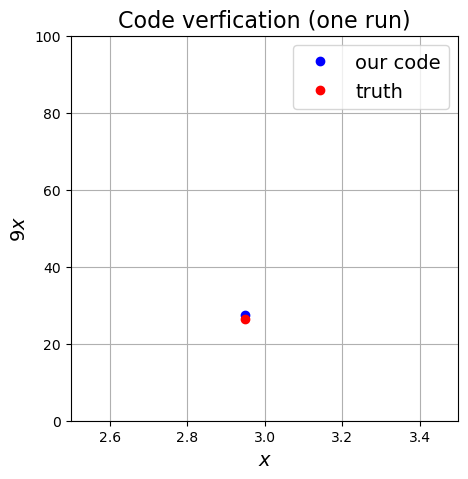

In [56]:
# the flawed algorithm
def times9(x):
    return 81 / x

fig = plt.figure(figsize=(5, 5))
ax1 = plt.subplot(111)

# value we want to test
x = 2.95
ax1.plot(x, times9(x), 'bo', label='our code')

ax1.plot(x, x*9, 'ro', label='truth')

ax1.set_xlabel('$x$', fontsize = 14)
ax1.set_ylabel('$9x$', fontsize = 14)
ax1.set_title('Code verfication (one run)', fontsize = 16)
ax1.grid(True)
ax1.set_xlim(2.5,3.5)
ax1.set_ylim(0,100)
ax1.legend(loc='best', fontsize=14)

print('The relative error in our calculation is: ', 
      np.abs(times9(x) - x*9)/(x*9))

So things look pretty good from the plot (partly as we set the $y$ axis limits to be quite large), and our relative error is around $3.4\%$. This may well be a low enough error "for engineering purposes".

But let's check some more.

A **"sanity check"** might simply be to check that as we increase the code's input the output increases - we know this to be true for our problem (times by 9) - this could be knowledge our domain expert imparts on us, or what observations tell us. 

This could also be called a "trend check".

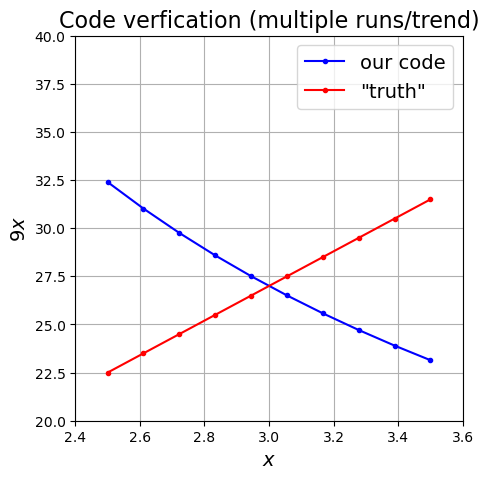

In [57]:
# the flawed algorithm
def times9(x):
    return 81 / x

fig = plt.figure(figsize=(5, 5))
ax1 = plt.subplot(111)

# range of values we want to test
x = np.linspace(2.5,3.5,10)
ax1.plot(x, times9(x), 'b.-', label='our code')

ax1.plot(x, x*9, 'r.-', label='"truth"')

ax1.set_xlabel('$x$', fontsize = 14)
ax1.set_ylabel('$9x$', fontsize = 14)
ax1.set_title('Code verfication (multiple runs/trend)', 
              fontsize = 16)
ax1.grid(True)
ax1.set_xlim(2.4,3.6)
ax1.set_ylim(20,40)
ax1.legend(loc='best', fontsize=14)

So our code doesn't pass the "sanity", or "trend" check - just by looking at the blue line (ignore the red for now) and knowing we expect to see growth.

**If** we were lucky enough to have some independent knowledge of the solution (the red line above), it's very clear we have big problems with our code.

But note we don't know whether the problem is with the model (i.e. the underlying equation), or our implementation in code (a bug).

For this problem our implementation is correct (there are no bugs in our code) but our starting equations are wrong - so we've failed the validation check really (our code is correct so technically we would pass verification, but this is a bit pointless if our underlying model/equations are wrong and validation has failed).

[For this problem there is a bit of a grey area between verification and validation as there isn't a clear distinction between the "mathematical model" and the methodology used to solve them].

If you discount the potential for getting the right answer for the wrong reasons (which you shouldn't!), then generally "validation"$\implies$"verification".

In almost all situations you have to assume that "verification"$\nRightarrow$"validation".  There are arguably some exceptions to this but it would be best practice to ignore these.

It's often quoted that **verification is a pre-requisite for validation**. Hence that's the order you would generally perform these activities, and the order we will discuss them in more detail now.

It's also the case that verification can be conducted on components of software in isolation, or on a computational model as it develops but before it is complete, while validation generally requires the full model to have been implemented.

## Verification

After some initial sanity checking (maybe as simple as checking your code runs and returns a sensible value, e.g. values of the right order of magnitude), the next step would be to conduct formal verification.

The AIAA definition of verification is:

> "Verification: The process of determining that a model implementation accurately represents the
developer's conceptual description of the model and the solution to the model."

An important point to note about verification is that we do not need to use physically realistic parameters as inputs - a good verification test can be completely artificial and non-physical.

Verification can be split into two aspects:

[for further discussion on vertification see: 
Christopher J.Roy, Review of code and solution verification procedures for computational simulation, Journal of Computational Physics, Volume 205, Issue 1, 1 May 2005, Pages 131-156 <http://ftp.demec.ufpr.br/CFD/bibliografia/erros_numericos/Roy_2005.pdf>]

### Code verification

Code verification is essentially targeted at finding and eliminating coding mistakes (bugs).

In principle if the code doesn't change then code verification only need to be performed once. 

In practice as compilers change previously hidden bugs may suddenly cause problems. Changes in external libraries, e.g. API changes, may also generate bugs in your code.

Code verification therefore needs to be an ongoing (ideally automated) activity (see more at <https://www.geosci-model-dev.net/4/435/2011/gmd-4-435-2011.pdf>)

A broader characterisation of this activity is [Software Quality Assurance](https://en.wikipedia.org/wiki/Software_quality_assurance).

Checking that the errors from the code, when solving a problem with an exact solution, converge at the expected rate is the most powerful approach to perform code verification (we saw this at the end of L1 where we confirmed our forward Euler implementation converged at first order). 

This is because **when performed carefully a convergence analysis will often show up even the smallest, subtlest bug which may not be obviously clear at all from a single run of the code.**

When driving down errors to an extreme amount, numerical parameter choices can compromise convergence rates, this isn't a bug and appropriate parameter choices may need to be made in order to fully verify the code - e.g. to differentiate a bug from the errors that result from a finite valued solver tolerance. Note that this aspect of code verification has overlap with the *solution verification* step to be discussed next.

If an exact solution isn't available, or to be used in addition even if it is, it is possible to use benchmark solutions - research communities often publish benchmark results for standard test cases - these may have been computed to such a high degree of accuracy by multiple independent models, and thus be de-facto considered truth. A downside is that the quoted quantities will not generally be complete solution fields, they may be pointwise or integral values, or some other derived/diagnostic quantity. There is therefore the potential, however unlikely, to fall foul of getting the right answer for the wrong reasons.

The benefit of benchmark solutions and the reasons they may be considered even when verification against an exact solution has been performed, is that often CPU timings for different codes will also be presented by the community. This gives us the opportunity to additionally compare our run times against others for a given accuracy.

But what if we fail code verification?  Actually tracking down the bug could be **extremely difficult**.

One option is to simplify the problem being solved.

Related to the community benchmark comments, there is the potential to download trusted external models/codes and compare directly against our code on a series of test cases through sanity check, benchmark test and against exact solution. The benefit here is that if we fail some aspect of code verification we can systematically de/in-crease complexity in both models side by side (e.g. turning off/on terms in the equations one by one) and the point at which we see differences helps us track down our bug.

I can't over-emphasise the value in comparing against trusted external models (if they exist!) when you are developing your own code.  But always question to what degree the external model can be trusted.

### A code verification testing hierarchy

We can characterise code verification steps as follows:


1. Sanity tests [qualitative] - does an experienced computational scientist and/or an application domain specialist think a solution looks correct. Actually that's very hard to say with confidence, but they can much more easily say a solution looks incorrect, in what ways it looks wrong, and experience therefore pointing to the bug potentially being "X, Y or Z".  A simple example of a sanity check might be if I input zero do I get zero as an output.


2. Trend/conservation tests [qualitative] - rather than looking at the result for a single calculation we could instead check that an expected trend is present - the physics implies that increasing an input parameter should lead to an increase/decrease in an output. Similarly the physics AND/OR the numerics (if implemented correctly) might be subject to conservation laws that can be checked - the integral of a quanitity in the domain should be conserved, e.g. mass.


3. Benchmark test ["quantitative"] - as discussed above, checking your code can recreate an accepted community benchmark value.


4. Comparison tests [qualitative/qualitative] - cursory or detailed side by side comparison against another code - as discussed above potentially incredibly useful. Can either be performed with benchmark tests or against exact solutions. Abstract sanity checks can also be used to zero in on locating a bug. Run time comparisons possible with 3 and 4 - unexpectedly slow run times could also point to bugs or poor choice of numerical parameters.


5. Against exact solutions [quantitative], which could be either

   5a. analytic solutions
   
   5b. or via the "Method of Manufactured Solutions"
   

<br>

We'll come back to 5 in particular later - this should be considered the "gold standard", but the whole hierarchy is useful, especially for locating bugs.

### Solution verification

If we have conducted a rigorous code verification step can we then confidently (or with little subsequent thought) make use of our model on problems that are *different* to the configuration of the exact or benchmark solution?

<br>

**NO!**

<br>


Why not? How might errors be introduced that negate or override the code verification we've conducted?  

<br>

Well essentially due to [**user error**](https://en.wikipedia.org/wiki/User_error), as well as the inherent limitations of discrete approximations to continuous objects.


#### Aside: describing "user error"

From <https://en.wikipedia.org/wiki/User_error>


- PEBKAC - "problem exists between keyboard and chair" and variations


- PICNIC - "problem in chair not in computer"


- EBKAC - "error between keyboard and chair"


<br>

- Said as an "ID-10-T" / "ID-Ten-T" error - which when spelled out gives "IDIOT" 


- In military said as "eye dee ten tango" /  "one delta ten tango"

For example, for all 4 of the items described above as inputs to a model, a user may make a mistake. They may mess up whatever pre-processing is required to generate input fields. They may choose the wrong physical parameters. They may select a poor, or inconsistent combination of, numerical parameter(s). They may mess up the post-processing or generate an inappropriate computational mesh.

Some of these will lead to a disastrous (unstable / obviously wrong) solution. This is a comparatively *good* result as something is obviously wrong and generally will be easy to figure out, also the simulation will ideally die quickly meaning minimal time is wasted.

More problematic are user choices that lead to plausible stable results, but which have errors that may not be obvious. 

This is tied up with *numerical errors* - a user's choices in how to set up a model will interact with inevitable numerical errors either in bad or acceptable ways.

**The worst possible scenario is that you have bugs, or errors that are too large to make a simulation useful, but you don't realise.**

While code verification is easy to understand and possible for a non-expert to conduct in a rigorous manner (although a non-expert is unlikely to be able to locate and fix a bug), solution verification is based far more on experience. 

This is because solution verification is more subjective and will be constrained by pragmatism - given finite resources and a possibly very complicated problem, what level of error is acceptable?

Source of **numerical error** are generally one of:


1. Round-off errors, or errors associated with floating point arithmetic


2. Iterative convergence errors


3. Discretisation errors

How does one conduct solution verification?

Essentially this can be boiled down to either "error estimation" or "sensitivity testing".

In **error estimation** we can use mathematical techniques to try and estimate the total error in a simulation. If acceptable we accept the answer (and are able to place an "error bar" on it!). If not we need to update our set-up. A common example is the use of an error estimator to guide mesh generation or mesh adaptivity - generating a new mesh, or updating an existing mesh, in order to achieve a given (acceptable for the given uses of the simulation) error tolerance.

**Sensitivity testing** is a more pragmatic approach whereby we alter all the user choices in the model and check that whatever conclusions or use we want to make from the numerical results, are insensitive to these choices. 

E.g. if I refine my mesh or reduce my time step size (or choose a different discretisation, ....) I check that my output quantities of interest only change by an acceptably small amount. What is acceptable will depend on what you are using the model for.

Note that in principle only two different choices need to be made to give some level of confidence that the outputs vary within acceptable bounds. This also doesn't need to be expensive - you don't necessarily need to refine your mesh or time step, coarsening could also be acceptable. 

<br>


This sensitivity testing should be the absolute minimum that the user of a model (as well as the developer of the model when using it in anger) performs. 

It's amazing how many papers/reports don't bother with this - they argue that the model has already been verified/validated (by themsleves or others in previous work), but of course we know that this does not preclude the various possible "user errors" (or poor user choices) that could mean you solution is useless.

### Summary

If you are writing code **you need to perform code verification** - there is no debate about this.

If you are a user of a code **you need to perform solution verification**. Strictly speaking this should be conducted for every new simulation, in practice (if you have some experience) you would probably only do this when major changes to the problem you are solving are made, your experience allowing you to judge if anything looks suspicious when minor changes are made, and also allowing you to judge if a change to the problem should be considered minor or major. At a minimum this solution verification should be some **sensitivity testing** of the user choices, especially those that may diverge from previously verified cases.

A user should also question whether the authors of the model have performed rigorous code verification. E.g. some sectors have very rigorous "Software Quality Assurance" procedures that stipulate what new software (or new versions of software) need to demonstrate in order for the community to have faith in that code. A respected body may then provide that software with "accreditation". This is common for software that is used in ["safety critical system"](https://en.wikipedia.org/wiki/Safety-critical_system).

Note that solution verification is still somewhat disjointed from asking whether or not our simulation is actually any good, e.g. has any predictive ability. This is where **validation** comes in ...

## Validation

There are lots of subtle variations on what the **validation of software** designed to simulate some process or system means.  

This is a definition which expands slightly on the AIAA definition (and due to Roache)

> "Validation: The process of determining the degree to which a model with its
associated data is an accurate representation of the real world as determined by experimental
data, the metrics of which are chosen from the perspective of the intended uses of the model."

Now clearly "validation" has different definitions in different disciplines of science and engineering.


Generally speaking you have developed a piece of software, or as a user you have obtained a piece of software, in order to simulate some real-world system.

As in lecture 1, the software will have been built up from decisions/compromises made as someone has progressed through (1) conceptual model, (2) a mathematical model which embodies the conceptual model, to (3) software implementation, and then (4) in its application by a user.

As already discussed verification focuses on the last two of these, while validation is concerned with the first two. 

Note that for some systems there is minimal debate on the equations (e.g. the Navier-Stokes equations to describe fluid dynamics), although conceptual models come in when processes such as turbulence need to be parametrised.

In other fields the equations are not known and so the stage of developing a conceptual model and turning that into a mathematical model is also key and so needs to be examined for correctness/appropriateness.

Generally speaking validation involves making qualitative and quantitative comparisons between the outputs of your model and measurements of the **real world**.

This often includes laboratory data since data is often cheaper and easier to collect here. Validation against lab data may be a useful stepping stone to validation against real world data. If we have only done the former and not the latter, then we haven't completely validated the model for the real world system.

In general we wouldn't necessarily expect a great agreement with data without some **"model calibration"**. This has overlap with "solution verification" described above. Simulating the full (e.g. real world) system as opposed perhaps somewhat smaller problems under "verification" often means that we need to make compromises with things like mesh resolution, this leads to numerical errors (e.g. truncation errors), and hence the precise details of the mesh can in practice impact on the results obtained. Calibration involves altering some of the (physical and numerical) input parameters in order to provide the best match against data. This can be done rigorously via approaches where calibration is performed on a subset of the available data, with some kept back to then independently assess predictive ability.

Calibration can be via trial and error (and hence user experience is very important), or it can be automated.

This takes us into the fields of data assimilation, inversion, optimal parameter estimation and uncertainty quantification.

All of these are extremely interesting and important but we don't have time to cover now. Some you will return to in the module Inversion & Optimisation, and some inevitably in your final projects.

# Errors

OK, that was a lot of hand-waving discussion that essentially boils down to working out (and controlling) errors.

Let's talk more about errors.

## Magnitudes

Consider a true solution value $x$ and its numerical approximation $x_{\text{approx}}$. Let's assume for a second that these are scalars.

The _**absolute error**_ is defined as the magnitude of the difference

$$e_{\text{abs}} = | x - x_{\text{approx}} |$$

The problem with this is how do we place whatever value we get in context - let's say we work out this error and get the value 100, is this a good result?  We need something to compare this to - to make it "relative".

The _**relative error**_ is defined as

$$e_{\text{rel}} = \frac{e_{\text{abs}}}{|x|} = \left|\frac{ x - x_{\text{approx}} }{x}\right| = \left|1-\frac{ x_{\text{approx}} }{x}\right| $$

from which if we want we can obtain a _**percentage error**_ if we multiple by 100:

$$e_{{\%}} = 100 \times \left|\frac{ x - x_{\text{approx}} }{x}\right|$$

The relative and percentage errors place our error in context (in the context of the true solution).

For the example above, if $x = 10^6$, then our error of 100 suddenly looks very good - a percentage error of $0.01\%$.

The above is only defined at present when $x$ is a scalar. What do we do if it is a field (e.g. a time series or spatial profile in 1D, a spatial field in 2D or 3D, ...)?  We need to introduce norms.

# Norms

A [norm](https://en.wikipedia.org/wiki/Norm_(mathematics)) on some space (could be finite dimensional, e.g. the space of all vectors, matrices; or it could be infinite dimensional, e.g. the space of all continuous functions) is a function which assigns to every entry in that space a *size*.

It is often denoted by the operator $\|\cdot\|\;$ (where $\cdot$ is a placeholder symbol indicating that we stick in the thing we are measuring the size of),

and satisfies the following properties for all entries $x$ and $y$ in the space under consideration and any scalar $\alpha$


<br>


1. $\|x\| \geq 0$, with $\|x\| = 0$ if and only if $x = 0$, i.e. only the zero entry in the space has a zero size.


2. $\|x + y\| \leq \|x\| + \|y\|$ (this is known as the [triangle inequality](https://en.wikipedia.org/wiki/Triangle_inequality)).


3. $\|\alpha x\| = |\alpha|  \|x\|$ for scalars $\alpha$. 

<br>


Norms are very useful when asking the question how large are my errors? Does my algorithm converge? Which algorithm is better? etc.

## Vector norms

Consider a vector $\boldsymbol{v}$ (assumed a $n\times 1$ column vector), we have multiple possible [*norms*](https://en.wikipedia.org/wiki/Norm_(mathematics)) to help us quantify its size or magnitude.

Three common ones (<https://en.wikipedia.org/wiki/Norm_(mathematics)#Examples>) are

\begin{align*}
\|\boldsymbol{v}\,\|_2 & = \sqrt{v_1^2 + v_2^2 + \ldots + v_n^2} = \left(\sum_{i=1}^n v_i^2 \right)^{1/2}, &&{\text{the two-norm}}\\[5pt]
\|\boldsymbol{v}\,\|_1  & = |v_1| + |v_2| + \ldots + |v_n| = \sum_{i=1}^n |v_i|, &&{\text{the one-norm}}\\[5pt]
\|\boldsymbol{v}\,\|_{\infty}  &= \max\{|v_1|,|v_2|, \ldots, |v_n| = \max_{i=1}^n |v_i|, &&{\text{the max-norm}}
\end{align*}

Termed the two norm, the one norm, and the maximum (or max-norm) norm, respectively.

I've placed the "two norm" first in this list as, when asked to compute the length of a vector, this is probably the one you would think of, and in this context it has the name "Euclidean norm".

The "one norm" also has the name the taxi-cab or manhattan norm: <https://en.wikipedia.org/wiki/Norm_(mathematics)#Taxicab_norm_or_Manhattan_norm>

Sometimes the max norm will be referred to as the infinity norm or inf-norm: <https://en.wikipedia.org/wiki/Norm_(mathematics)#Maximum_norm_(special_case_of:_infinity_norm,_uniform_norm,_or_supremum_norm)>

In 2D we can define the "unit circle" as the shape that is formed by all points that are unit (magnitude of 1) distance from the origin. 

For example, if we know the two-norm magnitude of a vector in 2D space (a vector in 2D space will be of length 2), but not the actual entries, we can constrain the possible entries to a circle.

Thus, in 2D, the two-norm unit circle is a circle. The concept of unit circle is different in different norms, which we can see below.

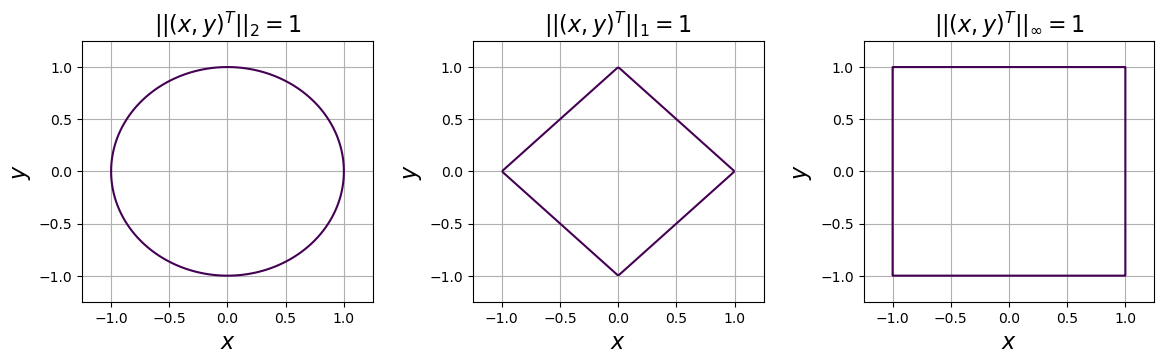

In [58]:
# define an x and y mesh spacing
x = np.linspace(-1.25, 1.25, 200)
y = x

# use meshgrid to expand these vectors to matrices
[X, Y] = np.meshgrid(x, y)

# initialise space to store the norm values over the (x,y) domain,
# i.e. these are matrices
two_norm = np.zeros_like(X)
one_norm = np.zeros_like(X)
inf_norm = np.zeros_like(X)

# loop over all points in our 2D space
for i in range(len(x)):
    for j in range(len(y)):
        # define the point as a vector of length 2
        op = np.array([x[i], y[j]])
        # compute and store the norm values
        two_norm[i, j] = sl.norm(op, 2)
        one_norm[i, j] = sl.norm(op, 1)
        inf_norm[i, j] = sl.norm(op, np.inf)

# we can now plot the "unit circles" using a contour plot where we only plot the unit contour:
fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131)

ax1.contour(X, Y, two_norm, levels = [1])
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('$|| (x,y)^T ||_{2} = 1$', fontsize=16)
ax1.grid(True)

ax2 = fig.add_subplot(132)

ax2.contour(X, Y, one_norm, levels = [1])
ax2.set_xlabel('$x$', fontsize=16)
ax2.set_ylabel('$y$', fontsize=16)
ax2.set_title('$|| (x,y)^T ||_{1} = 1$', fontsize=16)
ax2.grid(True)

ax3 = fig.add_subplot(133)

ax3.contour(X, Y, inf_norm, levels = [1])
ax3.set_xlabel('$x$', fontsize=16)
ax3.set_ylabel('$y$', fontsize=16)
ax3.set_title('$|| (x,y)^T ||_{\infty} = 1$', fontsize=16)
ax3.grid(True)

plt.tight_layout(pad = 2.0)

Note that we can prove from the mathematical definitions, and what is consistent with the above plots:

$$\|\boldsymbol{v}\|_{\infty} \leq
\|\boldsymbol{v}\|_2 \leq
\|\boldsymbol{v}\|_1$$


## Warning

The example above shows that while the details are different these norms are to an extent equivalent, i.e. it often doesn't really matter which you use.

There are two things you need to be wary of however:


1. How each of these respond to *outliers* in the data



2. What happens when the number of entries in the vector changes.



<div class="optional">

### Example 1 - response to outliers [*]

Here we are going to fit a *linear* line to some invented data, and see what happens if we create an outlier - how much is the slope of the best-fit line impacted?
    
If we want to be robust in our estimation of a trend (i.e. the slope), then we might not want one outlier, which could be due to measurement error, to impact our result very much.
    
</div>

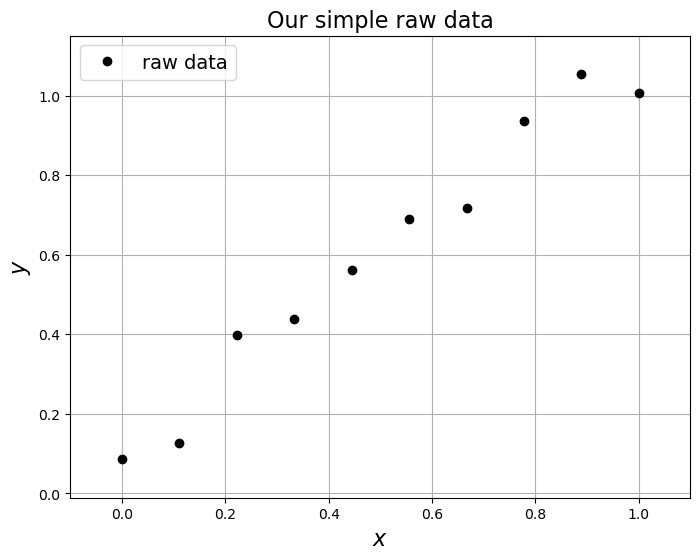

In [59]:
# Invent some raw data - we will use the notation (xi,yi) for the
# given data, where xi and yi are of length N+1 (N=len(xi)-1)
xi = np.linspace(0,1,10)
yi = xi +  0.2 * np.random.random((10,))

# We will want to overlay a plot of the raw data a few times below so 
# let's do this via a function that we can call repeatedly
# [Note that I've been a bit lazy in later lectures and really should
# do this sort of thing more often to make code easier to read - apologies]
def plot_raw_data(xi, yi, ax):
    """Plot x vs y on axes ax, 
    add axes labels and turn on grid

    Parameters
    ----------
    xi : array_like
        Array containing x data
    yi : array_like
        Array containing y data
    ax :  matplotlib axes, optional
        The axes to plot on
    """
    ax.plot(xi, yi, 'ko', label='raw data')
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.grid(True)


# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)

# For clarity we are going to add a small margin to all the plots.
ax1.margins(0.1)

# plot the raw data
plot_raw_data(xi, yi, ax1)

# add a figure title
ax1.set_title('Our simple raw data', fontsize=16)

# Add a legend
ax1.legend(loc='best', fontsize=14);
# loc='best' means we let matplotlib decide the best place for the
# legend to go.  For other options see 
#  https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html

poly_coeffs:  [1.004852 0.099372]


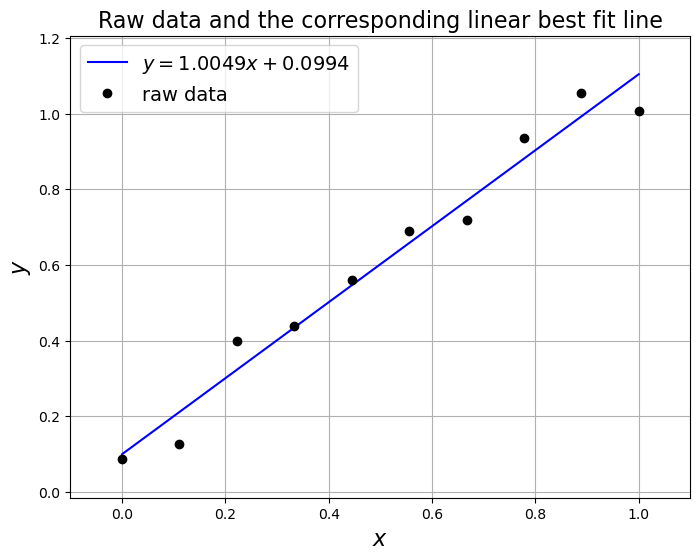

In [60]:
# Fit a polynomial of degree 1, i.e. a straight line, to our (xi, yi) data from above
# we'll explain what's going on here later in this lecture
degree = 1
poly_coeffs = np.polyfit(xi, yi, degree)
print('poly_coeffs: ',poly_coeffs)

# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(poly_coeffs)

# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# Plot the linear fit - define 100 evenly spaced points (x) covering our
# x extent and plot our linear polynomial evaluated at these points (p1(x))
# of course 100 is overkill for this linear example
x = np.linspace(0., 1, 100)

ax1.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(poly_coeffs[0], poly_coeffs[1]))

# Overlay raw data
plot_raw_data(xi, yi, ax1)

# Add a legend
ax1.legend(loc='best', fontsize=14)

# add a figure title
ax1.set_title('Raw data and the corresponding linear best fit line', fontsize=16);

We have used NumPy's polynomial fitting function which "minimises the squared error" <https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html>

i.e. it seeks the polynomial (here we chose just a straight line) which minimises the two-norm of the errors at the locations where we have data.

[Don't worry about the details too much here, we'll go over these methods in detail in the next lecture].


We can code this up ourselves using SciPy, and in doing so check that our code recreates above when we choose the two-norm, but also see what happens if we select other norms with which to define the best fitting line - we need to code it up ourselves to allow us to change the norm!

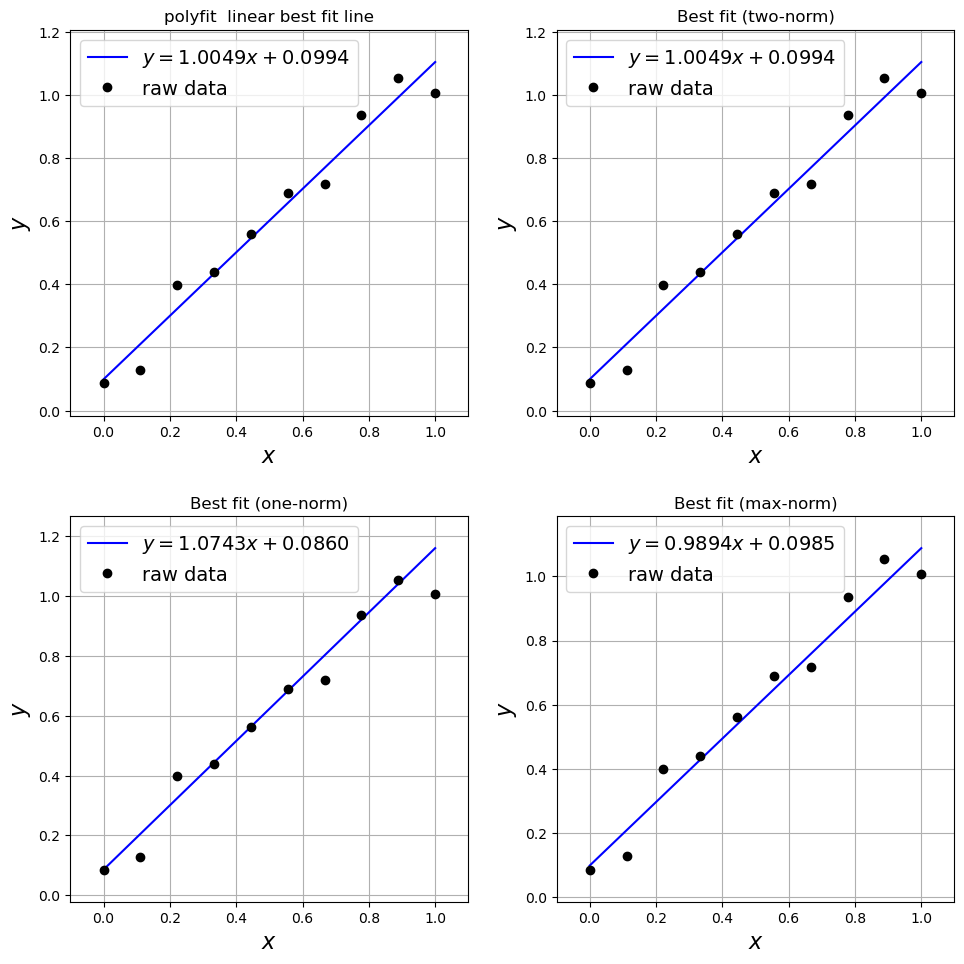

In [61]:
from scipy.optimize import minimize

def line_fit(x, line_coeffs):
    """
    Calculate y values for a given line and given x values

    Parameters
    ----------
    x : array_like
        Array containing x data
    line_coeffs : array_like
        Array containing gradient and constant

    """
    return line_coeffs[0]*x + line_coeffs[1]

def cost_fun(line_coeffs, x, y, norm):
    """Cost function using two, one or max-norm

    Parameters
    ----------
    line_coeffs : array_like
        Array containing gradient and constant
    x : array_like
        Array containing x data
    y : array_like
        Array containing y data
    norm : string
        'two' for two-norm, 'one' for one-norm, 'max' for max-norm
    """
    if norm=='two':
        return sl.norm(y - line_fit(x, line_coeffs), 2)
    elif norm=='one':
        return sl.norm(y - line_fit(x, line_coeffs), 1)
    elif norm=='max':
        return sl.norm(y - line_fit(x, line_coeffs), np.inf)
    else:
        raise ValueError('check your norm string')

degree = 1
poly_coeffs = np.polyfit(xi, yi, degree)
p1 = np.poly1d(poly_coeffs)

# set up figure
fig = plt.figure(figsize=(10, 10))

# polyfit line
ax = fig.add_subplot(221)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(poly_coeffs[0], poly_coeffs[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('polyfit  linear best fit line', fontsize=12)
        
# minimise two-norm cost function
x0 = np.zeros_like(poly_coeffs)
output = minimize(cost_fun, x0, args=(xi,yi,'two'))
# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(output.x)
ax = fig.add_subplot(222)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(output.x[0], output.x[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (two-norm)', fontsize=12)

# minimise one-norm cost function
x0 = np.zeros_like(poly_coeffs)
output = minimize(cost_fun, x0, args=(xi,yi,'one'))
# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(output.x)
ax = fig.add_subplot(223)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(output.x[0], output.x[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (one-norm)', fontsize=12)

# minimise max-norm cost function
x0 = np.zeros_like(poly_coeffs)
output = minimize(cost_fun, x0, args=(xi,yi,'max'))
# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(output.x)
ax = fig.add_subplot(224)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(output.x[0], output.x[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (max-norm)', fontsize=12)


plt.tight_layout(pad = 2.0)

Note that our code recreates the `numpy.polyfit` result when we choose the two-norm. Note also that we get slightly different results when we use the one-norm or the max-norm.

These results are all equally valid. The fact that `numpy.polyfit` implements the two-norm without giving us the ability to change the norm highlights that so-called "least squares" fitting is by far the most common approach, but there may be situations where the other norms are beneficial.

Let's see what happens when we perturb a single entry - this is motivated by a situation where maybe one of our sensors failed and gave a spurious result.

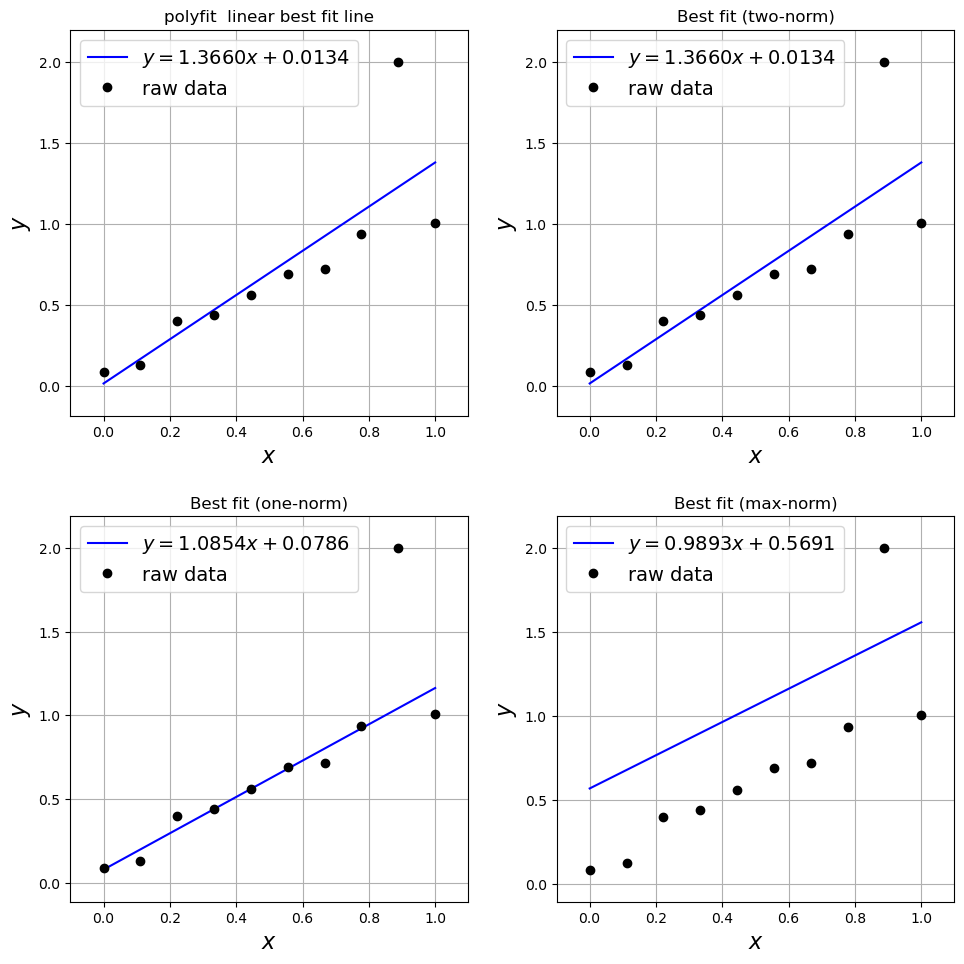

In [62]:
# perturb one of the entries - imagine it's corrupted or subject to major measurement error

yi[8] = 2.

degree = 1
poly_coeffs = np.polyfit(xi, yi, degree)
p1 = np.poly1d(poly_coeffs)

# set up figure
fig = plt.figure(figsize=(10, 10))

# polyfit line
ax = fig.add_subplot(221)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(poly_coeffs[0], poly_coeffs[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('polyfit  linear best fit line', fontsize=12)

# minimise two-norm cost function
x0 = np.zeros_like(poly_coeffs)
output = minimize(cost_fun, x0, args=(xi,yi,'two'))
# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(output.x)
ax = fig.add_subplot(222)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(output.x[0], output.x[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (two-norm)', fontsize=12)

# minimise one-norm cost function
x0 = np.zeros_like(poly_coeffs)
output = minimize(cost_fun, x0, args=(xi,yi,'one'))
# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(output.x)
ax = fig.add_subplot(223)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(output.x[0], output.x[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (one-norm)', fontsize=12)

# minimise max-norm cost function
x0 = np.zeros_like(poly_coeffs)
output = minimize(cost_fun, x0, args=(xi,yi,'max'))
# use poly1d to turn the coeffs into a function, p1, we can evaluate
p1 = np.poly1d(output.x)
ax = fig.add_subplot(224)
ax.margins(0.1)
x = np.linspace(0., 1, 100)
ax.plot(x, p1(x), 'b', label=r'$y = {0:.4f}x+{1:.4f}$'.format(output.x[0], output.x[1]))
plot_raw_data(xi, yi, ax)
ax.legend(loc='best', fontsize=14)
ax.set_title('Best fit (max-norm)', fontsize=12)


plt.tight_layout(pad = 2.0)

If you compare the resulting slopes of the best fit lines, between this case with the outlier with the previous slopes without the outlier, you should see that the one-norm is by far the least impacted while the max-norm is the most impacted.

These sorts of issues will be important in the modules on **Inversion & Optimisation** and **Machine Learning**.

### Example 2 - comparing vectors of differing lengths

Consider the example from the first lecture where we numerically integrated the logistic ordinary differential equation and compared the error against the exact solution at the end time, i.e. we defined the error in the calculation as `abs(x_all[-1] - x_ex(t_max,x0,alpha))`

Now we know from that for this type of problem the solution converges to an "attractor", and hence the error could initially grow, but then reduce (this isn't normal behaviour for errors) as both the exact and the numerical solution converge to the same (or similar) attractors.

A fairer means of computing the error would be some sort of "average" over time - we could evaluate the error at every computed time level, this would give us a vector of errors, and then we could compute the norm of this error to give us a scalar number we can plot on the $y$ axis of our convergence plots.

First let's re-run the exact code from last time:

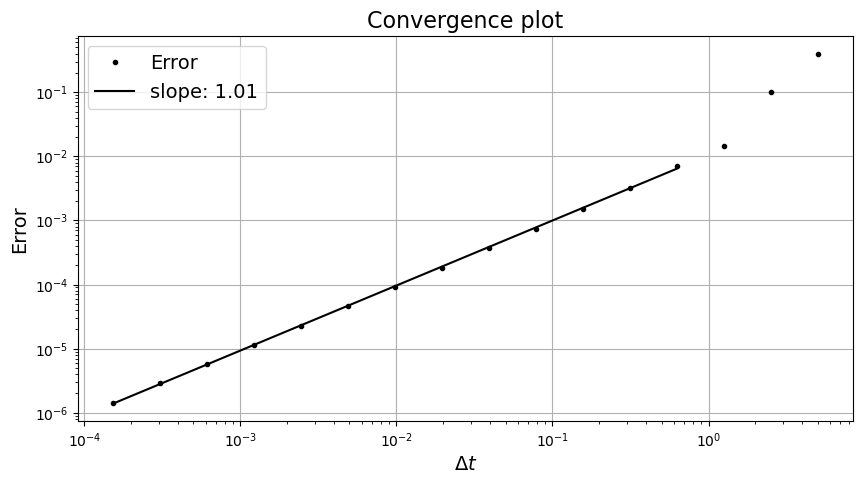

In [63]:
def logistic_rhs(alpha, x):
    return alpha*x*(1-x)

def x_ex(t, x0, alpha):
    """Function to evaluate the exact solution to the logistic problem.

    Parameters
    ----------
    t : numpy.ndarray or float
        Times
    x0 : float
        Initial population, value from 0 to 1
    alpha : float
        Parameter

    Returns
    -------
    numpy.ndarray or float
        Function values for times given
    """
    return x0/(x0 + (1-x0)*np.exp(-alpha*t))
    
def time_step(alpha, x0, t0, t_max, dt):
    """Implement simple time-stepper

    Parameters
    ----------
    alpha : float
        A problem parameter
    x0 : float
        Initial condition
    t0 : float
        Initial time
    t_max : float
        The last time step
    dt : float
        Time step size

    Returns
    -------
    tuple of ndarray
        Tuple containing numpy arrays with all x and t values within
        the specified interval
    """
    x = np.array(x0)
    t = np.array(t0)
    x_all = [x0]
    t_all = [t0]  
    while t < t_max:
        # start from the most recent value
        x = x_all[-1]
        x = x + dt * logistic_rhs(alpha, x)
        x_all.append(x) 
        t = t + dt
        t_all.append(t)
    return np.array(x_all), np.array(t_all)

alpha = 0.95
t0 = 0.0
x0 = 0.1

dt = 5.
# as this problem approaches an attractor at large times - this obfuscates the early time errors
# so only run for a relatively short time
t_max = 5.
errors = []
dt_array = []

# compute error in forward euler solution as dt varies
while dt > 1.e-4:
    dt_array.append(dt)
    x_all, t_all = time_step(alpha, x0, t0, t_max, dt)
    errors.append(abs(x_all[-1] - x_ex(t_max,x0,alpha)))
    dt *= 0.5

fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax1.loglog(dt_array, errors, 'k.', label='Error')
ax1.set_xlabel('$\Delta t$', fontsize=14)
ax1.set_ylabel('Error', fontsize=14)
ax1.set_title('Convergence plot', fontsize=16)
ax1.grid(True)

# use numpy.polyfit to find best fit linear line to data
# we expect linear asymptotic behaviour - use this parameter to discount some of  the larger dt values
start_fit = 3

line_fit1 = np.polyfit(np.log(dt_array[start_fit:]), np.log(errors[start_fit:]), 1)
ax1.loglog(dt_array[start_fit:], np.exp(line_fit1[1]) * dt_array[start_fit:]**(line_fit1[0]), 'k-', label = 'slope: {:.2f}'.format(line_fit1[0]))

ax1.legend(loc='best', fontsize=14)

We see first-order convergence which agrees with theory.

We should see the same if instead of only comparing the error at the end time step, we measure the size of the vector of errors over all time steps. And it shouldn't matter which vector norm we choose to use to establish this measure.

Let's check:

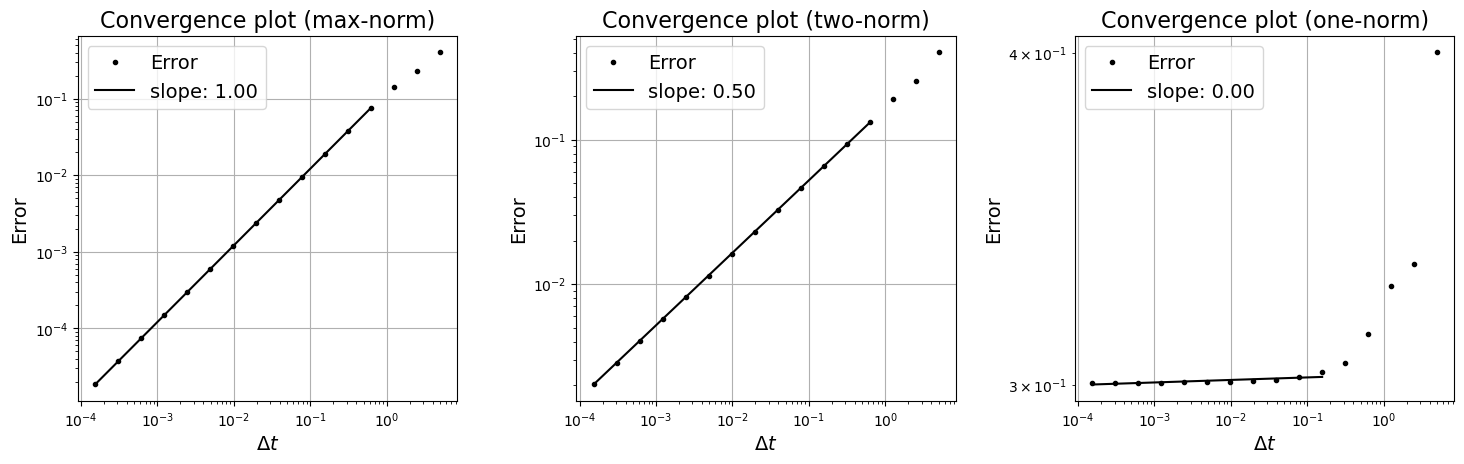

In [64]:
alpha = 0.95
t0 = 0.0
x0 = 0.1

t_max = 5.

errors = []
dt_array = []
dt = 5.

while dt > 1.e-4:
    dt_array.append(dt)
    x_all, t_all = time_step(alpha, x0, t0, t_max, dt)
    errors.append(sl.norm(x_all - x_ex(t_all,x0,alpha),np.inf))
    dt *= 0.5

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].loglog(dt_array, errors, 'k.', label='Error')
axs[0].set_xlabel('$\Delta t$', fontsize=14)
axs[0].set_ylabel('Error', fontsize=14)
axs[0].set_title('Convergence plot (max-norm)', fontsize=16)
axs[0].grid(True)
start_fit = 3
line_fit1 = np.polyfit(np.log(dt_array[start_fit:]), np.log(errors[start_fit:]), 1)
axs[0].loglog(dt_array[start_fit:], np.exp(line_fit1[1]) * dt_array[start_fit:]**(line_fit1[0]), 
              'k-', label = 'slope: {:.2f}'.format(line_fit1[0]))
axs[0].legend(loc='best', fontsize=14)


errors = []
dt_array = []
dt = 5.
while dt > 1.e-4:
    dt_array.append(dt)
    x_all, t_all = time_step(alpha, x0, t0, t_max, dt)
    errors.append(sl.norm(x_all - x_ex(t_all,x0,alpha),2))
    dt *= 0.5

axs[1].loglog(dt_array, errors, 'k.', label='Error')
axs[1].set_xlabel('$\Delta t$', fontsize=14)
axs[1].set_ylabel('Error', fontsize=14)
axs[1].set_title('Convergence plot (two-norm)', fontsize=16)
axs[1].grid(True)
start_fit = 3
line_fit1 = np.polyfit(np.log(dt_array[start_fit:]), np.log(errors[start_fit:]), 1)
axs[1].loglog(dt_array[start_fit:], np.exp(line_fit1[1]) * dt_array[start_fit:]**(line_fit1[0]), 
              'k-', label = 'slope: {:.2f}'.format(line_fit1[0]))
axs[1].legend(loc='best', fontsize=14)

errors = []
dt_array = []
dt = 5.
while dt > 1.e-4:
    dt_array.append(dt)
    x_all, t_all = time_step(alpha, x0, t0, t_max, dt)
    errors.append(sl.norm(x_all - x_ex(t_all,x0,alpha),1))
    dt *= 0.5

axs[2].loglog(dt_array, errors, 'k.', label='Error')
axs[2].set_xlabel('$\Delta t$', fontsize=14)
axs[2].set_ylabel('Error', fontsize=14)
axs[2].set_title('Convergence plot (one-norm)', fontsize=16)
axs[2].grid(True)
start_fit = 5 # i've set this a bit larger to capture the final trend
line_fit1 = np.polyfit(np.log(dt_array[start_fit:]), np.log(errors[start_fit:]), 1)
axs[2].loglog(dt_array[start_fit:], np.exp(line_fit1[1]) * dt_array[start_fit:]**(line_fit1[0]), 
              'k-', label = 'slope: {:.2f}'.format(line_fit1[0]))
axs[2].legend(loc='best', fontsize=14)

plt.tight_layout(pad = 2.0)

So the result with the max-norm is consistent with when we simply use the error at the final time. Of course on the assumption that the maximum error is at the end time, then this makes sense as the max-norm of all the errors would indeed then just return the error at the final time.

But something strange has gone on for the two-norm and the one-norm. 

For the two-norm our rate of convergence has gone from first order, to order half. And for the one-norm we don't show convergence at all.  

What's happened?

Well the length of the vectors of differences at each time level gets longer as we make the time step size smaller (as we fix our end time - halve the time step gives us double the size of error vector), and looking at the mathematical definitions (the summations) it is clear that the magnitude of the two-norm and the one-norm will grow for each case as we are adding up more numbers (note the max-norm doesn't suffer from this due to its definition and this is why convergence is unaffected).

\begin{align*}
\|\boldsymbol{v}\|_2 & = \sqrt{v_1^2 + v_2^2 + \ldots + v_n^2} = \left(\sum_{i=1}^n v_i^2 \right)^{1/2}, &&{\text{the two-norm}}\\[5pt]
\|\boldsymbol{v}\|_1  & = |v_1| + |v_2| + \ldots + |v_n| = \sum_{i=1}^n |v_i|, &&{\text{the one-norm}}\\[5pt]
\|\boldsymbol{v}\|_{\infty}  &= \max\{|v_1|,|v_2|, \ldots, |v_n| = \max_{i=1}^n |v_i|, &&{\text{the max-norm}}
\end{align*}

<br> 

We can fix this by either only evaluating the error at the original locations in time, i.e. throwing away the errors at many of the time levels for the smaller `dt` values, and computing the error on a single consistent temporal mesh,

or by updating the definitions of these norms to be based on averages rather than summations:

\begin{align*}
\|\boldsymbol{v}\|_{2*} & = \left(\frac{1}{n}\sum_{i=1}^n v_i^2 \right)^{1/2} = \frac{1}{n^{1/2}} \left(\sum_{i=1}^n v_i^2 \right)^{1/2}, \\[5pt]
\|\boldsymbol{v}\|_{1*}  & = \frac{1}{n}\sum_{i=1}^n |v_i|
\end{align*}

to make a fair comparison between vectors with different sizes we are *normalizing* these norms based on the number of entries of the vectors.

<br>

[Note that the two$^*$-norm as defined here is also known as the [**root mean square error**](https://en.wikipedia.org/wiki/Root-mean-square_deviation) (more on this below), and the one$^*$-norm as defined here is also known as the [**mean absolute error**](https://en.wikipedia.org/wiki/Mean_absolute_error).  See also [Advantages of the mean absolute error (MAE) over the root mean square error (RMSE) in assessing average model performance](https://www.jstor.org/stable/24869236).]

<br>

Let's check that if we use these updated definitions then we again can show convergence:

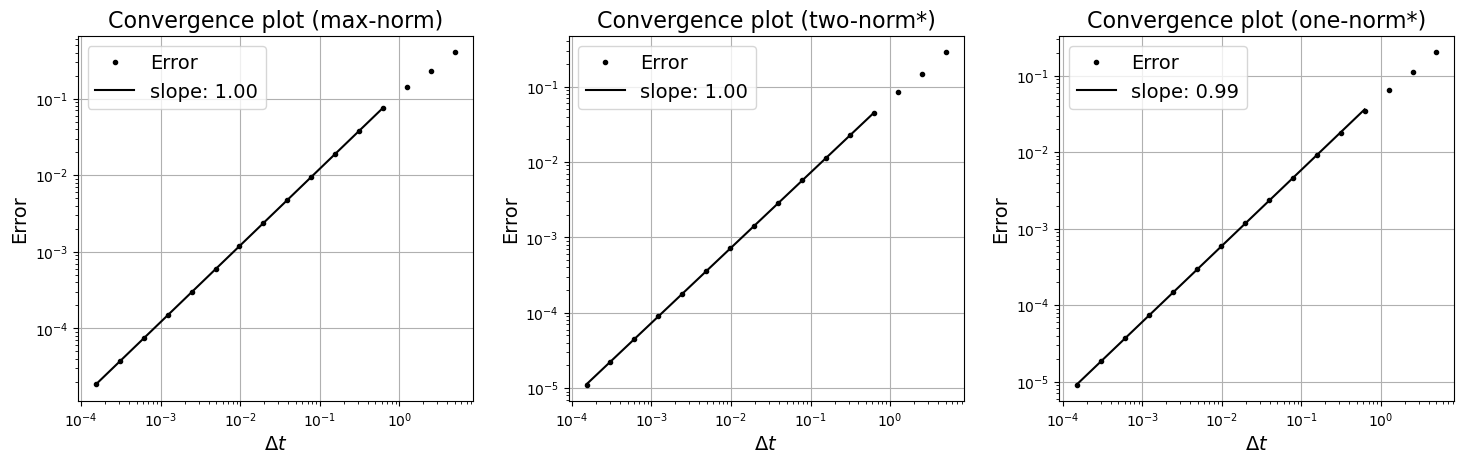

In [65]:
alpha = 0.95
t0 = 0.0
x0 = 0.1

t_max = 5.

errors = []
dt_array = []
dt = 5.

while dt > 1.e-4:
    dt_array.append(dt)
    x_all, t_all = time_step(alpha, x0, t0, t_max, dt)
    errors.append(sl.norm(x_all - x_ex(t_all,x0,alpha),np.inf))
    dt *= 0.5

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].loglog(dt_array, errors, 'k.', label='Error')
axs[0].set_xlabel('$\Delta t$', fontsize=14)
axs[0].set_ylabel('Error', fontsize=14)
axs[0].set_title('Convergence plot (max-norm)', fontsize=16)
axs[0].grid(True)
start_fit = 3
line_fit1 = np.polyfit(np.log(dt_array[start_fit:]), np.log(errors[start_fit:]), 1)
axs[0].loglog(dt_array[start_fit:], np.exp(line_fit1[1]) * dt_array[start_fit:]**(line_fit1[0]), 
              'k-', label = 'slope: {:.2f}'.format(line_fit1[0]))
axs[0].legend(loc='best', fontsize=14)


errors = []
dt_array = []
dt = 5.
while dt > 1.e-4:
    dt_array.append(dt)
    x_all, t_all = time_step(alpha, x0, t0, t_max, dt)
    # our updated norm
    errors.append(sl.norm(x_all - x_ex(t_all,x0,alpha),2)/np.sqrt(len(x_all)))
    dt *= 0.5

axs[1].loglog(dt_array, errors, 'k.', label='Error')
axs[1].set_xlabel('$\Delta t$', fontsize=14)
axs[1].set_ylabel('Error', fontsize=14)
axs[1].set_title('Convergence plot (two-norm*)', fontsize=16)
axs[1].grid(True)
start_fit = 3
line_fit1 = np.polyfit(np.log(dt_array[start_fit:]), np.log(errors[start_fit:]), 1)
axs[1].loglog(dt_array[start_fit:], np.exp(line_fit1[1]) * dt_array[start_fit:]**(line_fit1[0]), 
              'k-', label = 'slope: {:.2f}'.format(line_fit1[0]))
axs[1].legend(loc='best', fontsize=14)

errors = []
dt_array = []
dt = 5.
while dt > 1.e-4:
    dt_array.append(dt)
    x_all, t_all = time_step(alpha, x0, t0, t_max, dt)
    # our updated norm
    errors.append(sl.norm(x_all - x_ex(t_all,x0,alpha),1)/len(x_all))
    dt *= 0.5

axs[2].loglog(dt_array, errors, 'k.', label='Error')
axs[2].set_xlabel('$\Delta t$', fontsize=14)
axs[2].set_ylabel('Error', fontsize=14)
axs[2].set_title('Convergence plot (one-norm*)', fontsize=16)
axs[2].grid(True)
start_fit = 3
line_fit1 = np.polyfit(np.log(dt_array[start_fit:]), np.log(errors[start_fit:]), 1)
axs[2].loglog(dt_array[start_fit:], np.exp(line_fit1[1]) * dt_array[start_fit:]**(line_fit1[0]), 
              'k-', label = 'slope: {:.2f}'.format(line_fit1[0]))
axs[2].legend(loc='best', fontsize=14)

plt.tight_layout(pad = 2.0)

As the two-norm is the default in `sl.norm`, we don't need to pass the "2" argument, and a concise way to write this updated (RMS - see next section) norm that makes use of SciPy (on the assumption that it's optimised better then we could do oursleves) is to compute

```Python
sl.norm(a - b) / np.sqrt(len(a))
```

where $a$ and $b$ are two vectors of discrete values of the same length.  Since in the `sl.norm` calculation the square root has already been taken, we need to divide through by the square root of the length of the vectors (which of course need to be the same as one another).

Of course you could wrap this in your own function.


<div class="optional">

## RMS (root mean square) norm and its relation to the $L^2$ norm [* - this is important, but in the interest of time]

What we defined above as two$^*$-norm is actually termed the **root-mean-square (RMS) error** - we take the square of the entries of the vector, compute the mean and then take the square root.

We pointed out that this was the redefinition of the (discrete) two-norm that accounted for fairly comparing vectors of differing lengths.

There is a related reason the RMS error is important and often used:

suppose we want to compute the difference between two continuous functions. We can do this by computing the so-called $L^2$ norm which is defined as the square root of the integral of the square of the difference between the functions:

\begin{align*} 
e_{L^2}  := \| f - g\|_{L^2(I)}
= \left( \int_I\, \left[f -g\right]^2\, dx\right)^{1/2}.
\end{align*}

The next example considers two functions and shows what is going on here.
   
</div>    

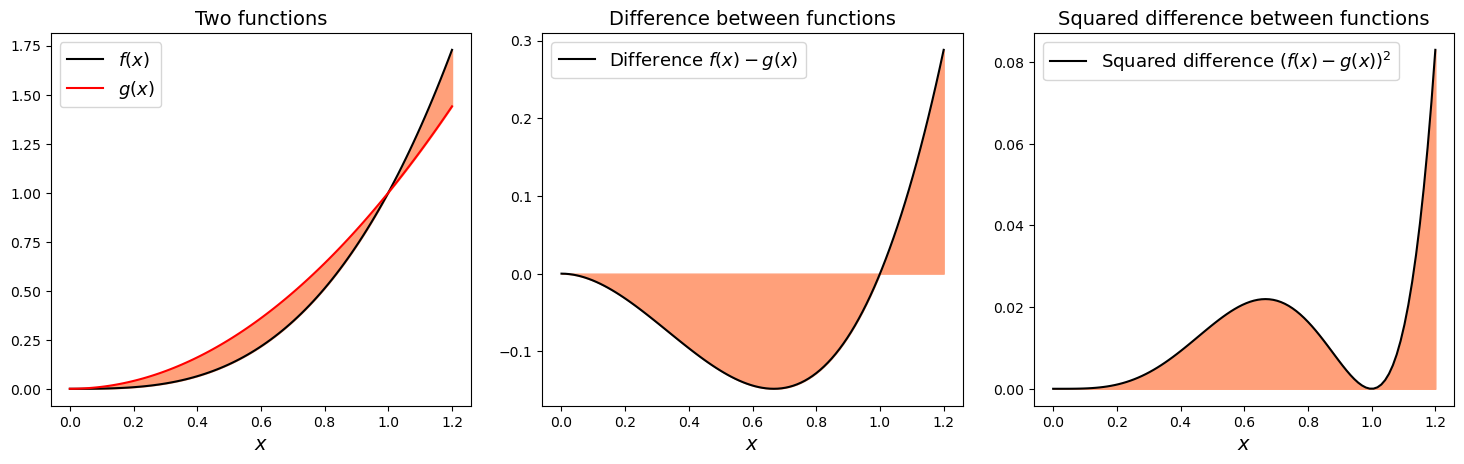

In [66]:
def func_1(x):
    return x**3

def func_2(x):
    return x**2

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

x = np.linspace(0.0, 1.2, 100)

ax1.plot(x, func_1(x) , 'k', label = '$f(x)$')
ax1.plot(x, func_2(x) , 'r', label = '$g(x)$')
# shade the region between the two to emphasise the difference
ax1.fill_between(x, func_1(x), func_2(x),color='lightsalmon')
ax1.legend(loc='best', fontsize=13)
ax1.set_xlabel('$x$', fontsize=14)
ax1.set_title('Two functions', fontsize=14)

ax2.plot(x, func_1(x) - func_2(x), 'k', label = 'Difference $f(x)-g(x)$')
ax2.fill_between(x, func_1(x) - func_2(x),color='lightsalmon')
ax2.legend(loc='best', fontsize=13)
ax2.set_xlabel('$x$', fontsize=14)
ax2.set_title('Difference between functions', fontsize=14)

ax3.plot(x, (func_1(x) - func_2(x))**2, 'k', label = 'Squared difference $(f(x)-g(x))^2$')
ax3.fill_between(x, (func_1(x) - func_2(x))**2,color='lightsalmon')
ax3.legend(loc='best', fontsize=13)
ax3.set_xlabel('$x$', fontsize=14)
ax3.set_title('Squared difference between functions', fontsize=14)

plt.tight_layout(pad = 2.0)


<div class="optional">

The square serves two roles - it makes all differences positive so they all contribute (errors in different locations cannot cancel one another out), and it weights differences in a nonlinear manner - twice the difference means a factor four contribution to the error.

The $L^2$ norm of the error is the square root of the area under the final curve.
    
</div>


<div class="optional">
    
We can approximate the integral as

$$ \int_I\, \left[f(x) - g(x)\right]^2\, dx 
\approx \sum_{i=1}^N  \, \left[f(s_i) - g(s_i)\right]^2\,\Delta s.$$


In this numerical approximation the $s_i$ represent the locations of discrete values after we have discretised our curve above, and $\Delta s$ is the spacing between these points (we assume these spacings are uniform but this can easily be generalised to the case where the spacing is not uniform).

In the case of computing an error between vectors the two functions are essentially already discretised, with $\Delta s$ being the time step for our time stepping example (this could again be generalised to the case of a spatial mesh error analysis, and more dimensions).

In the case of a uniformly distributed set of points, if we assume that our domain is of length 1, then

$$\Delta s = \frac{1}{N}.$$

Note that we've introduced a scaling here by assuming $1/N$ rather than $T/N$ where $T$ is the total simulation time.  But for the application of comparing errors on increasingly fine temporal meshes, $T$ is the same for all the vectors we will be comparing so this scaling isn't important, and you could introduce it if wanted at the end.


Let's plot what's going on here to convince ourselves that this is indeed a reasonable approximation to the integral, and it converges if we decrease $\Delta s$.

</div>

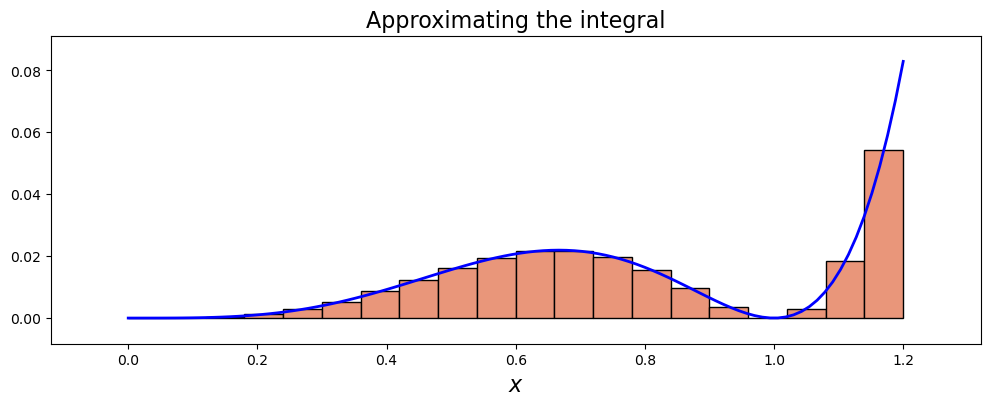

The sum of the areas of the rectangles is (I_M): 0.011711733381


In [67]:
from matplotlib.patches import Rectangle

def func_3(x):
    return (func_1(x) - func_2(x))**2

x = np.linspace(0.0, 1.2, 100)

# plot
fig = plt.figure(figsize=(12, 4))
ax1 = plt.subplot(111)
ax1.plot(x, func_3(x), 'b', lw=2)

ax1.margins(0.1)

# label axis
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_title('Approximating the integral', fontsize=16)



number_intervals = 20
dx = 1./(number_intervals)
xi = np.linspace(0, 1.2, number_intervals+1)
# define si points to be the midpoints of these intervals
si = 0.5*(xi[:-1] + xi[1:])
ds = dx
I_M = 0.0
for i in range(number_intervals):
    ax1.add_patch(Rectangle((xi[i], 0.0), (xi[i+1] - xi[i]),
                            func_3((xi[i+1]+xi[i])/2), fill=True, 
                            edgecolor='k', facecolor='darksalmon', lw=1))
    I_M += func_3(si[i])*ds

# use an explicit show here to force the figure to appear before the following print.
plt.show()
print('The sum of the areas of the rectangles is (I_M): {:.12f}'.format(I_M))


<div class="optional">

We have done here what is termed numerical integration, or quadrature - approximating the area under the curve using a finite number of function evaluations.

The point here is that the RMS error can be interpreted as a discrete analogue of the $L^2$ norm:

\begin{align*} 
e_{L^2} & := \| f - g\|_{L^2(I)}\\[10pt]
&= \left( \int_I\, \left[f - g\right]^2\, dx\right)^{1/2}\\[10pt]
&\approx \left( \frac{1}{N} \sum_{i=1}^N  \, \left[f(s_i) - g(s_i)\right]^2 \right)^{1/2}
\\[10pt]
&=: e_{\text{RMS}}.
\end{align*}

</div>

# Comparing algorithms against analytic solutions - code verification

An [analytic solution](http://mathworld.wolfram.com/Analytic.html) just means an exact solution we can write down in closed form (e.g. not in terms of an infinite series), or for some people it just means a solution that is obtained using analytic(al) rather than numerical means.


There are two approaches we can take here.

In general we won't have access to analytic solutions for **all** problems we want to apply our code to. If we did then what is the point of the numerical approach in this case?

We might be able to find analytic solutions to representative problems we want our code to solve.  To do this we may need to make some simplifications to the problem, e.g. make a nonlinear problem linear, consider simple forms of boundary conditions, etc. 

This isn't ideal as it isn't necessarily fully stressing all parts of the code, or confronting it with complex solution behaviour.

We have three scenarios:


1. We can find an analytic solution where we don't need to simplify the type of problem we want to solve.


2. We need to simplify our problem in order to find an analytic solution.


3. We can construct a solution to the full problem (plus some extra terms, i.e. arguably more complex rather than simplified!).



For ODEs we can generally do 1 - we'll go through an example below.

But for PDEs, this isn't generally possible. People typically therefore conduct option 2, but the 3rd option is a very powerful approach that we will also explain here in the context of ODEs (which we have seen so far, although note the approach is perhaps more common for PDEs).

Note that with option 2 we really need to consider a suite of tests which even if all the terms aren't included at once, all of the terms of considered in different combinations. Even then this really isn't as good as options 1 or 3.

## A problem with an exact solution to compare against

Let's suppose that we want to verify our forward Euler code we saw from lecture 1

```Python
def forward_euler(f, y0, t0, t_max, dt):
    """ Forward Euler time stepper
    f is the RHS function expected to be of the form f=f(t,y)
    """
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        y = y + dt*f(t, y) 
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)
```

Suppose we've verified convergence to simple problems with $\,f\equiv y\,$ and $\,y \equiv\exp(t)\,$, where we can find the analytic solution, 

but are concerned that we haven't verified it in the case where the RHS function depends on both $t$ *and* $y$ at the same time. 

Well we can do this with the ODE

$$ y' \equiv \dot{y} \equiv \frac{dy}{dt} = t^3 + y, \qquad y(0)=y_0=1 $$

Now with PDEs we don't have much chance of finding an exact solution to a general problem we write done, but with ODEs we have a chance.

Python has a **symbolic math package** called SymPy. 

Let's see how we could use this to try and find a solution to our problem. 

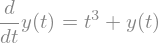

In [68]:
# import Python's symbolic math library
import sympy as sym
# print maths nicely:
sym.init_printing()
# define the 'symbols' that will be our variables/parameters
t, y0 = sym.symbols('t, y0')
# define a function - this will be the solution we're looking for
y = sym.Function('y')
# define this function's derivative with respect to t
dydt = y(t).diff(t)
# define the ODE - see https://docs.sympy.org/latest/tutorial/gotchas.html#tutorial-gotchas-equals
ode_expr = sym.Eq(dydt, y(t) + t**3) 
# print it out to check it's correct
ode_expr

In [69]:
# solve the ODE symbolically
ode_sol = sym.dsolve(ode_expr, y(t))
ode_sol

In [70]:
# above included a constant of integeration C_1, 
# we can specify this in the solve so we don't need to work it our separately
ode_sol = sym.dsolve(ode_expr, y(t), ics={y(0):1})
ode_sol

In [71]:
# try simplifying this
sym.simplify(ode_sol)

In [72]:
# and turn it into a function we can evaluate (so we can easily plot it or compare against it)
ode_sol_fun = sym.lambdify(t, ode_sol.rhs)

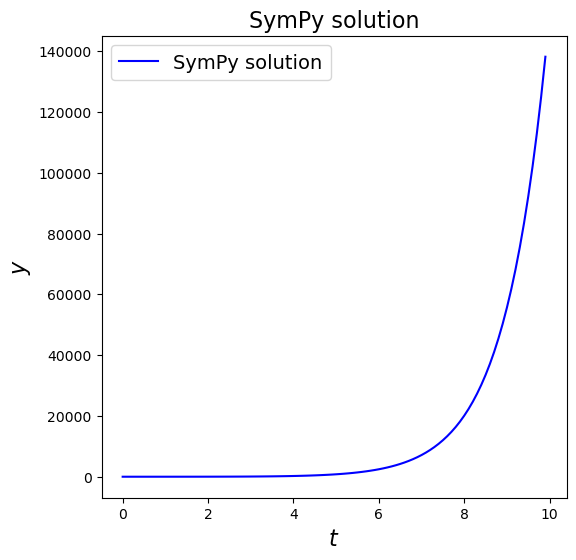

In [73]:
# now plot the solution using the function we just generated
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(111)

t = np.arange(0, 10, 0.1)
ax1.plot(t, ode_sol_fun(t), 'b', label='SymPy solution')

ax1.set_xlabel('$t$', fontsize = 16)
ax1.set_ylabel('$y$', fontsize = 16)
ax1.set_title('SymPy solution', fontsize = 16)
ax1.legend(loc='best', fontsize = 14);

So now we have an analytic solution, let's solve the problem numerically using the forward Euler scheme we derived in lecture 1 and compare it against the analytic solution.

Since we now know how to compute the RMS error, let's use this as our norm to compare

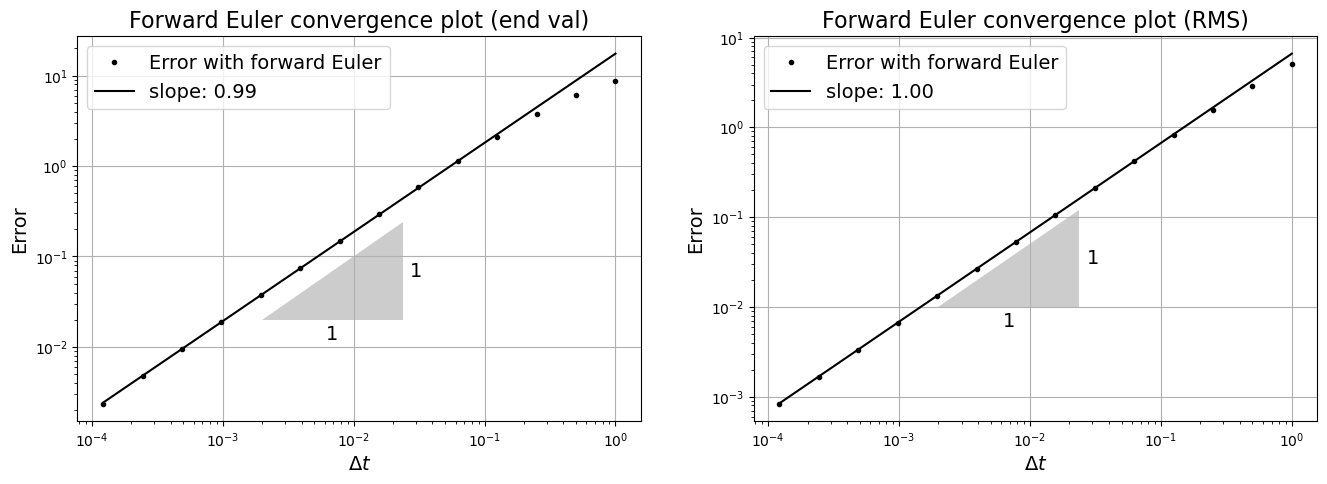

In [74]:
# problem definition (RHS function)
def f(t, y):
    return y + t**3

# exact solution
def y_ex(t):
    return -t**3 - 3*t**2 - 6*t + 7*np.exp(t) - 6
  
def forward_euler(f, y0, t0, t_max, dt):
    """Forward Euler time stepper

    Parameters
    ----------
    f
        RHS function expected to be of the form f=f(t,y)
    y0 : float
        Initial y value
    t0 : float
        Initial time
    t_max : float
        The last timestep
    dt : float
        Timestep size

    Returns
    -------
    tuple of ndarray
        Tuple containing numpy arrays with all y and t values within
        the specified interval
    """
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]  
    while t < t_max:
        y = y_all[-1]
        y = y + dt * f(t, y) 
        y_all.append(y) 
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)

t0 = 0.0
y0 = y_ex(t0)

# space to store the errors and time step sizes in the conv analysis
error1 = []
error2 = []
dt_array = []

# an initial dt value
dt = 1.0

# as per comment below, what happens if we choose
#dt = 1.1

# the integration period
t_max = 2.0

while dt > 1.e-4:
    dt_array.append(dt)
    y_all, t_all = forward_euler(f, y0, t0, t_max, dt)
    error1.append( abs(y_all[-1] - y_ex(t_max)) )  # mag of final error
    #error1.append( abs(y_all[-1] - y_ex(t_all[-1])) )  # this would be more robust
    error2.append( sl.norm(y_all - y_ex(t_all)) / np.sqrt(len(y_all)) )   # RMS
    dt *= 0.5


fig = plt.figure(figsize=(16, 5))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

# plot end time error
ax1.loglog(dt_array, error1, 'k.', label='Error with forward Euler')
ax1.set_xlabel('$\Delta t$', fontsize=14)
ax1.set_ylabel('Error', fontsize=14)
ax1.set_title('Forward Euler convergence plot (end val)', fontsize=16)
ax1.grid(True)


# plot RMS error
ax2.loglog(dt_array, error2, 'k.', label='Error with forward Euler')
ax2.set_xlabel('$\Delta t$', fontsize=14)
ax2.set_ylabel('Error', fontsize=14)
ax2.set_title('Forward Euler convergence plot (RMS)', fontsize=16)
ax2.grid(True)

# use numpy.polyfit to find best fit linear line to data

start_fit = 3

line_fit = np.polyfit(np.log(dt_array[start_fit:]), np.log(error1[start_fit:]), 1)
ax1.loglog(dt_array, np.exp(line_fit[1]) * dt_array**(line_fit[0]), 'k-', label = 'slope: {:.2f}'.format(line_fit[0]))

# add a nice way to indicate slope
annotation.slope_marker((2.e-3, 2e-2), (1, 1), ax=ax1,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))

start_fit = 3

line_fit = np.polyfit(np.log(dt_array[start_fit:]), np.log(error2[start_fit:]), 1)
ax2.loglog(dt_array, np.exp(line_fit[1]) * dt_array**(line_fit[0]), 'k-', label = 'slope: {:.2f}'.format(line_fit[0]))


# add a nice way to indicate slope
annotation.slope_marker((2.e-3, 1e-2), (1, 1), ax=ax2,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))

ax1.legend(loc='best', fontsize=14)
ax2.legend(loc='best', fontsize=14)

Note that in the above the starting `dt` is an exact integer factor of `t_max`, and then we divide dt by 2 each time, so it remains an exact integer factor.

What happens if you start with dt not being an exact integer factor, e.g. try `dt` = 1.1.

How does the convergence plot change, and why might this have happened?

Safer to use `y_ex(t_all[-1])`, but then you really need a separate check that the simulation has successfully reached the end time you wanted.

We never fully addressed the question of why we plot these sorts of graphs using a log-log plot.


# Plotting errors using a log-log plot

## Motivation

Why did we plot the convergence of the method (i.e. the error as a function of interval size (or number of subintervals)) using logarithmic scales on both the $x$ and the $y$ axis?

This is a very common thing to do when we think we have some polynomial relationship.  

In our case of ODE solvers, based on the Taylor series derivation where we we truncated the full expression by throwing away the second order terms, we can expect the error to be dominated for small $\Delta t$ values by the quadratic terms, i.e.

$$\text{error} = \mathcal{O}({\Delta t^2}) \quad\text{as}\quad \Delta t\rightarrow 0$$

By plotting using log-log axes it allows us to visually confirm whether or not this is true.

We'll explain why next, but essentially in log-log space we see in the plot above that we have a straight line (for small enough $\Delta t$ values). The line is not necessarily straight to the right of the image (i.e. for larger $\Delta t$ values) as other (higher-order) parts of the full error expansion are contributing to the total error in a non-trivial manner. We saw an example of this when we talked about Big-O notation in an earlier lecture.

As we move to the left they become less and less important and we do indeed observe a straight line - we reach the asymptotic limit.  The second important thing to note is the slope of this line - here we see it is approximately 1.
    


    
## Theory

Suppose we are plotting $y$ vs $x$ data.

If we have a simple [monomial](https://en.wikipedia.org/wiki/Monomial) relationship of the form 

$$ y = ax^k, $$

then taking the log of this equation (in any base, although note that unless otherwise stated we always assume that $\log$ is base $e$), we get

\begin{align*}
\log(y) &= \log\left(ax^k\right)\\
&= \log(a) + \log\left(x^k\right)\\
&= \log(a) + k \log(x)\\
&=  k \log(x) + \log(a) 
\end{align*}

Thus if we were to plot the curve $y = ax^k$ (or data points from this expression) using log-log axes (i.e. letting $X:=\log(x)$ and $Y:=\log(y)$) then the curve/points would follow

$$Y = m X + c,$$

which we recognise as the equation for a *straight line* with slope $m$ (and intercept $c$).

So **if** we plot data using log-log axes and **if** we get a straight line then we know the underlying function must be of the form $\, y = ax^k $, where we can estimate $k$ by finding the slope of the line.

Similarly, if we get *approximately* a straight line, of *approximate* slope $k$, then we know that $\, y \approx ax^k $.  

Or, if we approach a straight line of splope $p$ in some limit say, then we know that $\, y = \mathcal{O}(x^p) $ in that limit.  This is our case from above.  

<br>

For more on this see:
<https://en.wikipedia.org/wiki/Log%E2%80%93log_plot>
    



You may have spotted that Taylor series analysis pointed to the dominant error term (the leading part of the Taylor series we ignored) being $\mathcal{O}(\Delta t^2)$, but the slope of our error plot above, for small $\Delta t$ values actually converged to a slope of 1, indicating the error is actually $\mathcal{O}(\Delta t)$ - what's going on here?

Well the answer is that $\mathcal{O}(\Delta t^2)$ is the error we would expect in a single time step. 

Since we did multiple time steps to reach our fixed end time, these accumulate by an extra order of magnitude - recall the figure from L1 repeated below. 

Theory demonstrates that the error at the final time should indeed be one order lower than the leading term in the Taylor series - essentially as the final time is fixed with a smaller time step we end up having to do more time steps, this and the accumulation of errors combine to lose us one order of convergence.

More on this in the next module for ACSE students.


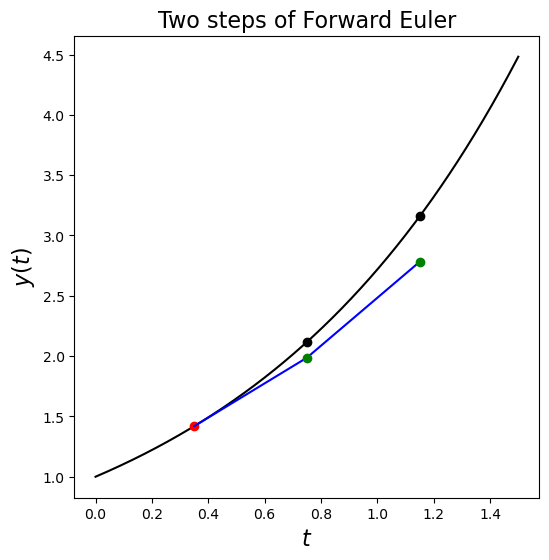

In [75]:
fig = plt.figure(figsize=(6, 6))
ax1 = plt.subplot(111)
ax1.set_title('Two steps of Forward Euler', fontsize=16)
ax1.set_xlabel('$t$', fontsize=16)
ax1.set_ylabel('$y(t)$', fontsize=16)

t = np.linspace(0, 1.5, 1000)

# the RHS of the ODE
def f(t,y):
    return y

# an example solution trajectory (or solution to ODE $\dot{y}=f(y), y(0)=1$)
def y(t):
    return np.exp(t)


ax1.plot(t, y(t), 'k', label='Trajectory $y=y(t)$')

# this is just some location in time
t0 = 0.35
# and an example of a time step size large enough we can see what the method is doing
dt = 0.4


ax1.plot([t0], [y(t0)], 'ro')
ax1.plot([t0, t0 + dt], [y(t0), y(t0) + dt * f(t0, y(t0))], 'b')
y1 = y(t0) + dt * f(t0, y(t0))
ax1.plot([t0 + dt, t0 + 2*dt], [y1, y1 + dt * f(t0+dt, y1)], 'b')

ax1.plot([t0 + dt, t0+2*dt], [y(t0 + dt), y(t0+2*dt)], 'ko')
ax1.plot([t0 + dt, t0 + 2*dt], [y(t0) + dt * f(t0, y(t0)), y1 + dt * f(t0+dt, y1)], 'go')


<div class="optional">

# The Method of Manufactured Solutions (MMS) [\* - this is quite involved, and specific to differential equations, so read through please if this is an area you plan to focus on]

Let's suppose for whatever reason we couldn't find a convenient exact solution - there just isn't one we can write down in analytic form, we don't know how to use symbolic tools, it's too difficult or we don't have time, ...

This is where the Method of Manufactured Solutions provides a very powerful and convenient approach.

Let's suppose we want to test our forward Euler code but we don't know anything about how to solve ODEs analytically.

Rather than starting from an equation and looking for a solution, the MMS approach starts from a "manufactured solution" and finds a corresponding equation (one that's very similar to the one we want to solve, and in verification of this we verify the code on the original).

We think to ourselves, what is a "non-trivial" solution - a solution that if our algorithm was able to recreate accurately we would be happy. 

By "trivial" I mean for our ODE solver to successfully recreate - for example $y=$constant, since then the RHS function is just zero, our code will get the answer correct exactly and we are not "stressing" our solver at all. We don't want this, we want a "non-trivial" solution.

Now this seems a stupid example, or that I am making an obvious point, but this is an issue we need to give appropriate care to in the case of PDEs - we may foolishly choose a solution that *looks* non-trivial but for which some of the terms in the PDE are actually zero (or very small compared to other terms), or exactly cancel for all numerical parameter choices - again we wouldn't be fully stressing all parts of our solver. So selection of an appropriate manufactured solution is an important part of the process, but shouldn't be that difficult with some trial and error, and turning terms on our solver on and off (and checking that the solution behaviour changes! If we turn a term on and off and the solution hardly changes, it indicates that that term wasn't doing much and the test we've come up with may not be a good for it).

Next we will demonstrate the general approach with an ODE example.

Second we will repeat in a manner that is actually a bit closer to how we would perform MMS on PDEs.
    
</div>


<div class="optional">

## A simple approach for an ODE

We want to test our implementation of our code to solve the ODE problem

$$ y' = f(t,y), \qquad y(0)=y_0 $$

<br>

Let's start by writing down a function of $t$, this will be our "manufactured solution":

$$y(t) = 7\exp(t) - 3t^2 - 6t - 5, \qquad \text{for which} \qquad y(0) = 2$$

the next step in MMS is to substitute this into the LHS of the equation our code is designed to solve:

$$ y' =  \frac{dy}{dt} = 7\exp(t) - 6t - 6 $$

If we use this expression we have just derived as the RHS of our solver (i.e. the $f(t,y)$ function) then we have by construction the analytic solution to compare against.

Now we could of course code these two functions up ourselves and proceed, but if possible (as depending on what manufactured solution we choose, and what O/PDE we are solving, this could be extremely complicated and easy to make a mistake either in our derivation by hand or in the implementation in code) it makes sense to try and do this symbolically, i.e. here to use SymPy - we're only differentiating so it shouldn't have a problem with this.
    
</div>

In [76]:
t, y = sym.symbols('t, y')
y_ex = 7*sym.exp(t) - 3*t**2 - 6*t - 5
print(y_ex)
print(sym.diff(y_ex,t))

-3*t**2 - 6*t + 7*exp(t) - 5
-6*t + 7*exp(t) - 6


This is consistent with what we have above.

Let's turn these into functions and use both of them (as the RHS source term we give to the solver, and the analytic solution we compare the solution to) directly in a convergence analysis.

In [77]:
y_ex_fun = sym.lambdify(t, y_ex)
f = sym.lambdify((t,y), sym.diff(y_ex,t))
# f here is a function of t and y to be consistent with what our solver function expects
# even though the form of f we have derived is only dependent on t

# lambdify just turns the sympy expression into a function we can easily evaluate, e.g.
print(f(0,1))

1.0


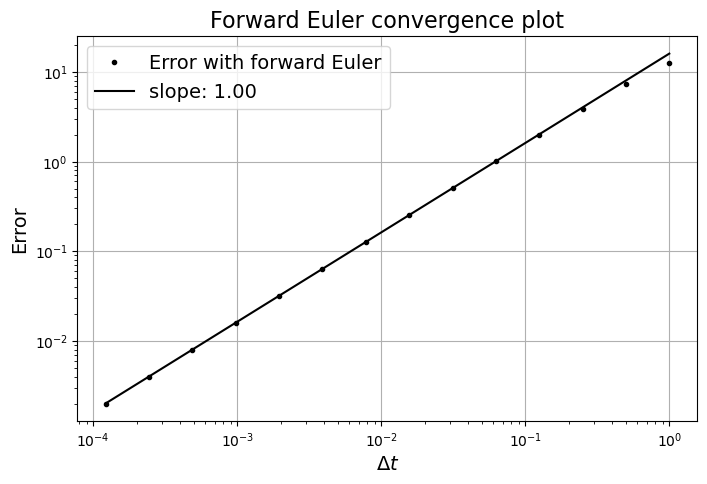

In [78]:
# now test cojnvergence using this exact solution and the corresponding f function we've derived

t0 = 0.0
y0 = y_ex_fun(t0) 

error = []
dt_array = []

# an initial dt value
dt = 1.0

# the integration period
t_max = 2.0

# compute error in forward euler solution as dt varies
while dt > 1.e-4:
    dt_array.append(dt)
    y_all, t_all = forward_euler(f, y0, t0, t_max, dt)
    error.append(abs(y_all[-1] - y_ex_fun(t_max))) 
    dt *= 0.5


fig = plt.figure(figsize=(8, 5))
ax1 = plt.subplot(111)

# plot error vs dt with a log-log plot
ax1.loglog(dt_array, error, 'k.', label='Error with forward Euler')
ax1.set_xlabel('$\Delta t$', fontsize=14)
ax1.set_ylabel('Error', fontsize=14)
ax1.set_title('Forward Euler convergence plot', fontsize=16)
ax1.grid(True)

# use numpy.polyfit to find best fit linear line to data

start_fit = 3

line_fit = np.polyfit(np.log(dt_array[start_fit:]), np.log(error[start_fit:]), 1)
ax1.loglog(dt_array, np.exp(line_fit[1]) * dt_array**(line_fit[0]), 'k-', label = 'slope: {:.2f}'.format(line_fit[0]))

ax1.legend(loc='best', fontsize=14)

<div class="optional">

## An approach more akin to how we would perform MMS on PDEs

Now you may notice that in performing the above we have changed the problem we want to solve - our RHS function is now only a function of $t$, there is no $y$ dependence - we need to spot things like this as we may not be as rigorous (i.e. complete) in our testing as we think we are.

Of course we could use what we've done so far to rearrange (using that we know $y(t) = 7\exp(t) - 3t^2 - 6t - 5$):

$$ y' \equiv \dot{y} \equiv \frac{dy}{dt} = 7\exp(t) - 6t - 6 = y + 3t^2 -1$$

and perform the convergence analysis with

```Python
def f2(t, y):
    return y + 3*t**2 -1
```



If you use this for for the RHS in the analysis above you will see that as expected we converge at the correct rate, but the errors are a little different - why? (Hint: refer back to the discussion of the forward Euler schematic from lecture 1).


<br>


However, the following is actually closer to what we would do with MMS for more general problems including PDEs. 

</div>

<div class="optional">
    
Let's suppose we have a solver (our forward Euler code will suffice), for the problem

$$ y' \equiv \dot{y} \equiv \frac{dy}{dt} = y$$

i.e. we have fixed the RHS.

Let's further suppose we don't know how to solve this problem analytically.

Rewrite the problem in terms of the (differential) operator:

$$L(y) = y'-y$$

$L(\cdot)$ is an operator and we know if we apply it to the exact solution we will get zero: $L(y_{\text{ex}}) = 0$, we might say that we have zero *residual* when plugging in the exact solution.


<br>


Now suppose we have a (manufactured) solution that isn't an exact solution: $y_{\text{mms}}$. 

Not being a solution is the same as saying that the residual is non-zero:

$$\text{residual} = L(y_{\text{mms}}) \ne 0$$

But of course $y_{\text{mms}}$ **is an exact solution to the modified problem**

$$y' - y = \text{residual}\qquad\text{or}\qquad y' = y+ \text{residual}$$

Since we choose $y_{\text{mms}}$ we can compute the appropriate derivatives etc contained in $L$ analytically and have an exact expression for the RHS residual - in typical O/PDE language we effectively have an **additional source term**.  

We simply update our code with this additional source term and conduct a convergence analysis using $y_{\text{mms}}$ as the exact solution.

Depending on whether our underlying solver already accepts a source term, we may or may not need to update the solver in order to perform this MMS analysis. But even if we do this is likely to be a relatively minor, and worthwhile update.

Further to this, we may be in a nice situation where our solver is in a language that also has symbolic capabilities so that we can automate most steps, which speeds things up and avoids us making silly errors in performing an MMS analysis.

For example:
    
</div>

In [79]:
# this is the new solver we want to check (the RHS is now:  y + source(t))

def our_solver(S, y0, t0, t_max, dt):
    """ A version of forward Euler that assumes our ODE 
    is of the form y' = y + source where source is 
    assumed to be a function of the form S(t)

    Parameters
    ----------
    S : callable
        The residual, L(y_ex) = y_ex' - y_ex
    y0 : float
        Exact value of y at time t0
    t0 : float
        Initial time
    t_max : float
        The last time step
    dt : float
        Time step size

    Returns
    -------
    tuple of ndarray
        Tuple containing numpy arrays for all y and t values within
        the specified interval
    """
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]  
    while t < t_max:
        y = y_all[-1]
        y = y + dt * (y + S(t)) 
        y_all.append(y) 
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)


t = sym.symbols('t')

# try a more complicated manufactured solution
y_ex = 7*sym.exp(t) - 3*t**2 - 6*t - 5 + sym.cos(3*t) + sym.log(1+t)
print(y_ex)
# this is the corresponding residual (what will become our source):  L(y_ex) = y_ex' - y_ex
print(sym.diff(y_ex,t) - y_ex)

# turn these into functions we can use in our solver and testing
y_ex_fun = sym.lambdify(t, y_ex)
S = sym.lambdify(t, sym.diff(y_ex,t) - y_ex)

-3*t**2 - 6*t + 7*exp(t) + log(t + 1) + cos(3*t) - 5
3*t**2 - log(t + 1) - 3*sin(3*t) - cos(3*t) - 1 + 1/(t + 1)


<div class="optional">
    
For the first of these to be a solution we can compare our solver against, we need to use the second as our source term.

First let's plot this solution just to check it isn't trivial in some way that would mean it's not a good candidate to test our code.
  
</div>

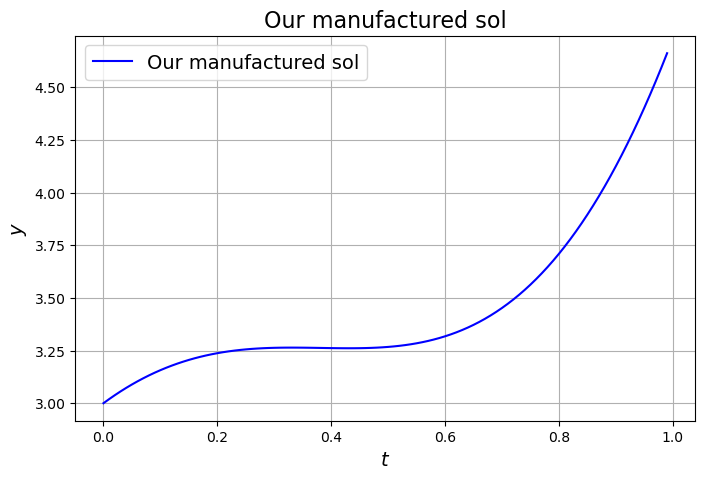

In [80]:
fig = plt.figure(figsize=(8, 5))
ax1 = plt.subplot(111)
t = np.arange(0, 1, 0.01)
ax1.plot(t,y_ex_fun(t), 'b', label='Our manufactured sol')
ax1.set_xlabel('$t$', fontsize=14)
ax1.set_ylabel('$y$', fontsize=14)
ax1.set_title('Our manufactured sol', fontsize=16)
ax1.grid(True)
ax1.legend(loc='best', fontsize=14)

<div class="optional">
    
Looks OK and is more complicated than the analytic solution we used earlier. 

Let's check convergence of our solver.
    
</div>

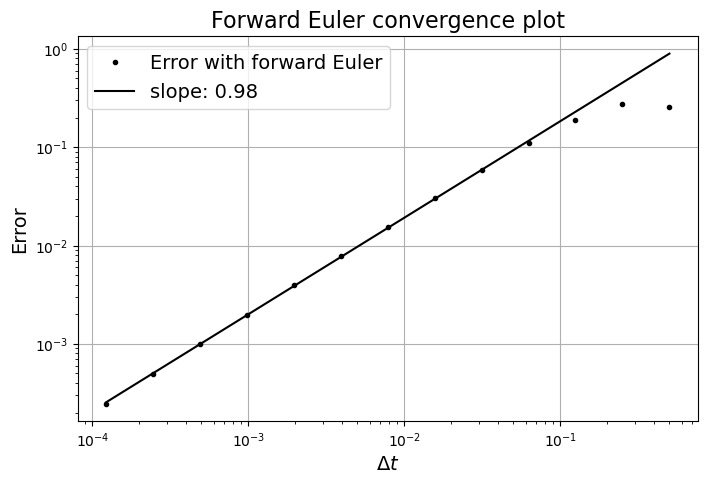

In [81]:
t0 = 0.0
y0 = y_ex_fun(t0)

error = []
dt_array = []

# an initial dt value
dt = 0.5

# the integration period
t_max = 1.0

# compute error in forward euler solution as dt varies
while dt > 1.e-4:
    dt_array.append(dt)
    y_all, t_all = our_solver(S, y0, t0, t_max, dt)
    error.append(abs(y_all[-1] - y_ex_fun(t_max))) 
    dt *= 0.5


fig = plt.figure(figsize=(8, 5))
ax1 = plt.subplot(111)

# plot error vs dt with a log-log plot
ax1.loglog(dt_array, error, 'k.', label='Error with forward Euler')
ax1.set_xlabel('$\Delta t$', fontsize=14)
ax1.set_ylabel('Error', fontsize=14)
ax1.set_title('Forward Euler convergence plot', fontsize=16)
ax1.grid(True)

# use numpy.polyfit to find best fit linear line to data

start_fit = 3

line_fit = np.polyfit(np.log(dt_array[start_fit:]), np.log(error[start_fit:]), 1)
ax1.loglog(dt_array, np.exp(line_fit[1]) * dt_array**(line_fit[0]), 'k-', label = 'slope: {:.2f}'.format(line_fit[0]))

ax1.legend(loc='best', fontsize=14)

<div class="optional">

In verifying convergence for the slightly more complicated problem (i.e. with the additional source term) we can conclude that our original solver is bug free.

We can do this with a solution that allows us to test convergence holds (i.e. the errors keep reducing at the correct rate) down to very very small errors - helping identify subtle bugs that may be hard to identify if we use one of the other (non-analytic solution based) verification methods. MMS allows us to do this without the pain of needing to find an analytic solution - so particularly powerful for complicated problems where this may simply not be possible.
    
</div>


<div class="optional">

# How can things go wrong? [\*]

Let's review some of the ways things can go wrong - how errors occur in a model.
    
</div>


<div class="optional">

## Rounding errors

Understanding/appreciating the limitations of the floating point arithmetic performed by finite computers, including [round-off errors](https://en.wikipedia.org/wiki/Round-off_error) and [loss of significance](https://en.wikipedia.org/wiki/Loss_of_significance) or "catastrophic cancellation", is vitally important.

This is often the topic of the first lecture of courses, or first chapter of books, on Numerical Methods or Numerical Analysis - do take a look at some examples if you are interested.  

You covered this briefly in ACSE-1.

Also take a look at *D. Goldberg 1991: What every computer scientist should know about floating-point arithmetic, ACM Computing Surveys 23, Pages 5-48*. [Google it and you will find pdfs online.  Or <https://docs.oracle.com/cd/E19957-01/806-3568/ncg_goldberg.html>].

For some examples of catastrophic failures due to round off errors see <https://www.ma.utexas.edu/users/arbogast/misc/disasters.html> and <http://ta.twi.tudelft.nl/users/vuik/wi211/disasters.html> and [the sinking of the Sleipner A offshore platform](http://www.ima.umn.edu/~arnold/disasters/sleipner.html).

Let's consider some examples.
    
</div>


<div class="optional">

### A very simple example

Here's a very simple example that illustrates the issue
    
</div>

In [82]:
a = 1/3
print('a is',a)
print('a with 16-digit decimal precision is {:.16f}'.format(a))
print('a with 17-digit decimal precision is {:.17f}'.format(a))
print('a with 20-digit decimal precision is {:.20f}'.format(a))
b = 3*a
print('\nb is 3*a with 16-digit decimal precision, which is {:.16f}'.format(b))
c = 100000*a - 33333
print('\nc is 100000*a - 33333, which is', c)
d = 3*c
print('\nd is 3*c, which is', d)
print('1-d is',1 - d**1000)

a is 0.3333333333333333
a with 16-digit decimal precision is 0.3333333333333333
a with 17-digit decimal precision is 0.33333333333333331
a with 20-digit decimal precision is 0.33333333333333331483

b is 3*a with 16-digit decimal precision, which is 1.0000000000000000

c is 100000*a - 33333, which is 0.3333333333284827

d is 3*c, which is 0.9999999999854481
1-d is 1.455191511734455e-08



<div class="optional">

### An example

As an example, consider the mathematical formula

$$f(x):=(1-x)^{10}.$$

We can of course relatively easily expand this out by hand

$$f(x) \equiv 1- 10x + 45x^2 - 120x^3 + 210x^4 - 252x^5 + 210x^6 - 120x^7 + 45x^8 - 10x^9 + x^{10}.$$

Mathematically these two expressions for $f(x)$ are identical.

But when evaluated by a computer different operations will be performed (note that different orders of the same operations will also lead to slight differences in results), which (we hope) should give the same answer. For numbers $x$ away from $1$ these two expressions do return (pretty much) the same answer.  

However, for $x$ close to 1 the second expression adds and subtracts individual terms of increasing size. These *should* largely cancel out, but they don't to sufficient accuracy due to round off errors; these errors accumulate with more and more operations, leading a loss of significance <https://en.wikipedia.org/wiki/Loss_of_significance>.
    
</div>

In [83]:
def f1(x):
    return (1. - x)**10


def f2(x):
    return (1. - 10.*x + 45.*x**2 - 120.*x**3 +
           210.*x**4 - 252.*x**5 + 210.*x**6 -
           120.*x**7 + 45.*x**8 - 10.*x**9 + x**10)


x=0.6
# values computed in different ways and their relative difference
print('f1(x), f2(x), 1.-f1(x)/f2(x): {0:.16e}, {1:.16e}, {2:.16e}'.format(f1(x), f2(x), 1.-f1(x)/f2(x))) 

x=0.8
print('f1(x), f2(x), 1.-f1(x)/f2(x): {0:.16e}, {1:.16e}, {2:.16e}'.format(f1(x), f2(x), 1.-f1(x)/f2(x))) 

x=0.95
print('f1(x), f2(x), 1.-f1(x)/f2(x): {0:.16e}, {1:.16e}, {2:.16e}'.format(f1(x), f2(x), 1.-f1(x)/f2(x))) 


f1(x), f2(x), 1.-f1(x)/f2(x): 1.0485760000000006e-04, 1.0485760000436464e-04, 4.1623815505431594e-11
f1(x), f2(x), 1.-f1(x)/f2(x): 1.0239999999999978e-07, 1.0240001356576212e-07, 1.3247813024364063e-07
f1(x), f2(x), 1.-f1(x)/f2(x): 9.7656250000000862e-14, 1.2378986724570495e-13, 2.1111273343425307e-01



<div class="optional">

### Minimising round-off errors

Take a look at the example of computing $\pi$ here <https://en.wikipedia.org/wiki/Floating-point_arithmetic#Minimizing_the_effect_of_accuracy_problems>
    
</div>


<div class="optional">

We'll see below a further example of this when we consider Fibonacci numbers, 

and then at the end if we have time we will consider ill-conditioned matrix problems where even the tiniest floating point errors can lead to disastrous results.
    
</div>


<div class="optional">

## Truncation errors

These are essentially due to needing to truncate a mathematical function or operation that includes infinitely many terms by a finite number of terms (so similar in nature to round-off - approximating something infinite by something discrete).

An example are the errors we saw when approximating the exponential function with a Taylor series in lecture 1 (or indeed any [transcendental function](https://en.wikipedia.org/wiki/Transcendental_function)).

This is very much linked to discretisation error where a similar truncation error is used in the formulation of discrete versions of derivative operators - more on this in a later lecture.

A homework exercise asks you to consider a problem which is susceptible to both round-off and truncation errors.
    
</div>


<div class="optional">

## Overflow

Overflow occurs when we try to create a new number via arithmetic operations that is outside the range that is representable with the  number of bits we have chosen to store numbers on our finite computer.

See <https://en.wikipedia.org/wiki/Integer_overflow>.
   
</div>


<div class="optional">

### Examples

"Nuclear Gandhi" is a fun example of a "bug" in the game Civilization which doesn't crash the software but leads to unexpected behaviour: <https://kotaku.com/why-gandhi-is-such-an-asshole-in-civilization-1653818245>.
    
</div>

In [84]:
y = np.int32([2147483644, 2147483645, 2147483646, 2147483647])
print(y)
print(y+1)

[2147483644 2147483645 2147483646 2147483647]
[ 2147483645  2147483646  2147483647 -2147483648]



<div class="optional">

We see slightly different behaviour with floats:

</div>

In [85]:
print(np.finfo(np.float64))

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
smallest_normal = 2.2250738585072014e-308   smallest_subnormal = 4.9406564584124654e-324
---------------------------------------------------------------



In [86]:
print(1.+ 0.5*np.finfo(np.float64).eps)
print(1.+ np.finfo(np.float64).eps)

1.0
1.0000000000000002


In [87]:
x = np.finfo(np.float64).max
print(x + 1)
print(x + 1e291)
print(x + 1e292)

x = np.finfo(np.float64).min
print(x - 1)
print(x - 1e291)
print(x - 1e292)

1.7976931348623157e+308
1.7976931348623157e+308
inf
-1.7976931348623157e+308
-1.7976931348623157e+308
-inf


C:\Users\mdpig\AppData\Local\Temp\ipykernel_33128\1481018401.py:4: RuntimeWarning: overflow encountered in scalar add
  print(x + 1e292)
C:\Users\mdpig\AppData\Local\Temp\ipykernel_33128\1481018401.py:9: RuntimeWarning: overflow encountered in scalar subtract
  print(x - 1e292)



<div class="optional">

Let's try to trigger an underflow warning (for a description of warnings and how to change how floating point errors are handled see <https://docs.scipy.org/doc/numpy/reference/generated/numpy.seterr.html>).

</div>

In [88]:
np.seterr()

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [89]:
np.seterr(under='warn')
x = np.nextafter(0, 1)
np.seterr(under='ignore')
np.seterr()

C:\Users\mdpig\AppData\Local\Temp\ipykernel_33128\58011207.py:2: RuntimeWarning: underflow encountered in nextafter
  x = np.nextafter(0, 1)


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

That was all very interesting, but see the recent post

Actually, The Bug That Made Gandhi Drop Nukes In Civilization Is Just A Myth - <https://www.thegamer.com/nuclear-gandhi-meme-civilization/>

"Civilization creator Sid Meier recently explained that the bug that made Gandhi drop nukes in the first Civ game is totally made up."

A bit disappointing, but it was still a good learning experience for us!


<div class="optional">

### Example - Fibonacci numbers

Consider the Fibonacci nunmbers:

$$ 0 \;  1 \; 1 \; 2 \; 3 \; 5 \; 8 \; 13 \; 21 \; \ldots$$

Let's label them $F_i$, $i=0,1,\ldots$.  

Then initialising with $F_0=0$, $F_1=1$ allows us to define all of the Fibonacci numbers via the recurrence relation

$$F_{i+1} = F_i+F_{i-1}$$

</div>

In [90]:
def compute_fib_number(n):
    F_i_minus_1 = 0
    if n==0: return 0
    F_i = 1
    if n==1: return 1
    F_i_plus_1 = 0
    for i in range(n-1):
        F_i_plus_1 =  F_i + F_i_minus_1
        F_i_minus_1 = F_i
        F_i = F_i_plus_1 
    return F_i_plus_1

print([compute_fib_number(i) for i in range(10)])
print(compute_fib_number(40))
print(compute_fib_number(50))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]
102334155
12586269025



<div class="optional">

Recall from a previous lecture that this code happily went up to compute the 1000th Fibonacci number.  

Let's treat these numbers as truth and see below various ways different versions of this function fail.

</div>


<div class="optional">

Lets write a different version of the function which initialises a numpy array and then fills it up with the numbers up to the $n$-th and output the whole array.

We'll initialise the array with `dtype=np.int32` in order to make a point.

</div>

In [91]:
def compute_fib_number2(n):
    fib = np.zeros(n+1, dtype=np.int32)
    fib[0]=0
    F_i_minus_1 = 0
    if n==0: return fib
    fib[1]=1
    if n==1: return fib
    for i in range(n-1):
        fib[i+2] = fib[i+1] + fib[i]
    return fib

print(compute_fib_number2(10))
print(compute_fib_number2(40)[-1])
print(compute_fib_number2(50)[-1])

[ 0  1  1  2  3  5  8 13 21 34 55]
102334155
-298632863


C:\Users\mdpig\AppData\Local\Temp\ipykernel_33128\3361680206.py:9: RuntimeWarning: overflow encountered in scalar add
  fib[i+2] = fib[i+1] + fib[i]



<div class="optional">

So we hit overflow for 32 bit signed integers.

We can see the limits via:

</div>

In [92]:
print(np.iinfo(np.int32))

# this is the largest we can compute with 32 bit ints
print(compute_fib_number2(46)[-1])

Machine parameters for int32
---------------------------------------------------------------
min = -2147483648
max = 2147483647
---------------------------------------------------------------

1836311903



<div class="optional">

So how did our first function manage this - as Python ints have arbitrary precision, but NumPy ints do not:

<https://mortada.net/can-integer-operations-overflow-in-python.html>

Let's see how far we should be able to push things if we use 64 bit ints:

</div>

In [93]:
np.iinfo(np.int64)
print(np.iinfo(np.int64))

Machine parameters for int64
---------------------------------------------------------------
min = -9223372036854775808
max = 9223372036854775807
---------------------------------------------------------------



In [94]:
def compute_fib_number3(n):
    fib = np.zeros(n+1, dtype=np.int64)
    fib[0]=0
    F_i_minus_1 = 0
    if n==0: return fib
    fib[1]=1
    if n==1: return fib
    for i in range(n-1):
        fib[i+2] = fib[i+1] + fib[i]
    return fib

print(compute_fib_number3(10))
print(compute_fib_number3(40)[-1])
print(compute_fib_number3(50)[-1])

[ 0  1  1  2  3  5  8 13 21 34 55]
102334155
12586269025


In [95]:
# reuse our test from lecture 1 homework
truth = 43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875

print(compute_fib_number(1000) == truth)

# can we push our new function this far?
print(compute_fib_number3(1000)[-1] == truth)

True
False


C:\Users\mdpig\AppData\Local\Temp\ipykernel_33128\3965212072.py:9: RuntimeWarning: overflow encountered in scalar add
  fib[i+2] = fib[i+1] + fib[i]



<div class="optional">

No, we hit overflow again.

Let's try using a matrix based approach, with ints.

</div>


<div class="optional">

Define

$$Q_k = \begin{pmatrix}
F_{k+1}\\
F_k
\end{pmatrix}$$

Then the Fibonacci numbers can equivalently be defined via

$$
Q_{k} = Q \,  Q_{k-1},
\qquad
Q = \begin{pmatrix}
1 & 1\\
1 & 0
\end{pmatrix}, \qquad
Q_0 = 
\begin{pmatrix}
F_{1}\\
F_0
\end{pmatrix}=  
\begin{pmatrix}
1\\
0
\end{pmatrix}
$$

</div>

In [96]:
def compute_fib_number4(n):
#    Q_k = np.array([1, 0], dtype=np.int32) # if not explicit defaults to int32 and reach overflow quite quickly
    Q_k = np.array([1, 0], dtype=np.int64)
    if n==0: return 0
    if n==1: return 1
    Q_k_plus_1 = Q_k
    Q = np.array([[1, 1],[1, 0]])   
    for k in range(n-1):
        Q_k_plus_1 =  Q@Q_k
        Q_k = Q_k_plus_1
    return Q_k[0]

print([compute_fib_number4(i) for i in range(10)])
print(compute_fib_number4(40))
print(compute_fib_number4(50))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]
102334155
12586269025




<div class="optional">
    
Of course this is equivalent to 

$$ Q_k
= \begin{pmatrix}
F_{k+1}\\
F_k
\end{pmatrix}
=Q Q_{k-1} =  Q^k \,  Q_{0} = Q^k \, \begin{pmatrix}
1\\
0
\end{pmatrix}
$$

This looks ripe for us to use what we learned about matrix diagonalisation and matrix powers:

$$ Q_k
= 
 Q^k \, \begin{pmatrix}
1\\
0
\end{pmatrix} = 
 P\Lambda^k P^{-1} \, \begin{pmatrix}
1\\
0
\end{pmatrix} 
$$

we computed the eigenvalues and eigenvectors in the previous homework exercises.

A difference in our implementation that this necessitates is that as the eigenvalues are floats, we have to move away from only using its.  Let's start by trying `dtype=np.float32`.


</div>

In [97]:
def compute_fib_number5(n):
    if n==0: return 0
    if n==1: return 1
    Q = np.array([[1, 1],[1, 0]], dtype=np.float32)   
    lam, vecs = sl.eig(Q)
    re_lam_power = [np.real(lami)**(n-2) for lami in lam] # make the assumption are all e'vals are real
    Q_power_n = vecs@np.diag(re_lam_power)@sl.inv(vecs) 
    return int(np.round(Q_power_n[0,0] + Q_power_n[0,1]))

print([compute_fib_number5(i) for i in range(10)])
print(compute_fib_number5(40))
print(compute_fib_number5(50))
print(compute_fib_number5(1000) == truth)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]
102334188
12586274419
False



<div class="optional">

The last three of these are all wrong, let's check when the answer went wrong by comapring with `compute_fib_number` which we are pretty confident is safe until a least $n=1000$.

</div>

In [98]:
for n in range(30,40):
    print(n, compute_fib_number(n), compute_fib_number5(n), 
         100*np.abs((compute_fib_number(n) - 
                 compute_fib_number5(n))/compute_fib_number(n)))

30 832040 832040 0.0
31 1346269 1346269 0.0
32 2178309 2178310 4.5907169276718774e-05
33 3524578 3524579 2.837219094030548e-05
34 5702887 5702889 3.506995667282203e-05
35 9227465 9227468 3.2511637811685005e-05
36 14930352 14930356 2.6791062930063536e-05
37 24157817 24157824 2.8976128099654035e-05
38 39088169 39088181 3.069982633364075e-05
39 63245986 63246006 3.1622560204848415e-05



<div class="optional">

The errors start to creep to a degree that our output integer is wrong at $n=32$, and the (relative) errors grow.

This is a consequence of floating point arithmetic.

We can do better with 64 bit floating point arithmetic.

</div>

In [99]:
def compute_fib_number6(n):
    if n==0: return 0
    if n==1: return 1
    Q = np.array([[1, 1],[1, 0]], dtype=np.float64)   
    lam, vecs = sl.eig(Q)
    re_lam_power = [np.real(lami)**(n-2) for lami in lam] # make the assumption are all e'vals are real
    Q_power_n = vecs@np.diag(re_lam_power)@sl.inv(vecs) 
    return int(np.round(Q_power_n[0,0] + Q_power_n[0,1]))

print([compute_fib_number6(i) for i in range(10)])
print(compute_fib_number6(40))
print(compute_fib_number6(50))
print(compute_fib_number6(1000) == truth)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]
102334155
12586269025
False


In [100]:
for n in range(30,40):
    print(n, compute_fib_number(n), compute_fib_number6(n), 
         100*np.abs((compute_fib_number(n) - 
                 compute_fib_number6(n))/compute_fib_number(n)))

30 832040 832040 0.0
31 1346269 1346269 0.0
32 2178309 2178309 0.0
33 3524578 3524578 0.0
34 5702887 5702887 0.0
35 9227465 9227465 0.0
36 14930352 14930352 0.0
37 24157817 24157817 0.0
38 39088169 39088169 0.0
39 63245986 63245986 0.0



<div class="optional">
    
So we're OK up to at least $n=50$, but fail some time before $n=1000$.

We'll always hit a limit:

</div>

In [101]:
n=70
print(n, compute_fib_number(n), compute_fib_number6(n), 
         100*np.abs((compute_fib_number(n) - 
                 compute_fib_number6(n))/compute_fib_number(n)),'\n')

n=80
print(n, compute_fib_number(n), compute_fib_number6(n), 
         100*np.abs((compute_fib_number(n) - 
                 compute_fib_number6(n))/compute_fib_number(n)))

70 190392490709135 190392490709135 0.0 

80 23416728348467685 23416728348467748 2.6903843723379283e-13



<div class="optional">

We can go to arbitrary precision if we make use of special libraries specifically for this job.
    
</div>

In [102]:
import mpmath  # arbitrary precision math library - see http://mpmath.org/
def compute_fib_number7(n):
    mpmath.mp.dps = 200  # set Decimal Precision
    if n==0: return 0
    if n==1: return 1
    Q = mpmath.matrix([[1, 1],[1, 0]])
    lam, vecs = mpmath.eig(Q)
    re_lam_power = [lami**(n-2) for lami in lam]
    # note * means matrix multiply (like numpy matrix)
    Q_power_n = vecs * mpmath.diag(re_lam_power) * mpmath.inverse(vecs)
    return int(mpmath.nint(Q_power_n[0,0] + Q_power_n[0,1]))


# just print the final digits:

n=500
print(n, str(compute_fib_number(n))[-10:], 
      str(compute_fib_number7(n))[-10:],  
         100*np.abs((compute_fib_number(n) - 
                 compute_fib_number7(n))/compute_fib_number(n)),'\n')

n=1000
print(n, str(compute_fib_number(n))[-15:], 
      str(compute_fib_number7(n))[-15:],  
         100*np.abs((compute_fib_number(n) - 
                 compute_fib_number7(n))/compute_fib_number(n)))

500 2521294125 2521294125 0.0 

1000 795166849228875 795186298191872 4.4744658956153756e-197


In [103]:
# push the precision even further to show we can do the n=1000 case


def compute_fib_number8(n):
    mpmath.mp.dps = 500  # set Decimal Precision
    if n==0: return 0
    if n==1: return 1
    Q = mpmath.matrix([[1, 1],[1, 0]])
    lam, vecs = mpmath.eig(Q)
    re_lam_power = [lami**(n-2) for lami in lam]
    # note * means matrix multiply (like numpy matrix)
    Q_power_n = vecs * mpmath.diag(re_lam_power) * mpmath.inverse(vecs)
    return int(mpmath.nint(Q_power_n[0,0] + Q_power_n[0,1]))


print(compute_fib_number8(1000) == truth)

True


<div class="optional">


# Matrix norms [*]

[*Matrix norms*](https://en.wikipedia.org/wiki/Matrix_norm)
provide us with a measure for the size of matrices.

For a matrix $A$ which for complete generality we will assume is of shape $m\times n$, common choices are:

\begin{align*}
\|A\|_F & = \left(\sum_{i=1}^m \sum_{j=1}^n A_{ij}^2 \right)^{1/2}, &&{\text{the matrix Euclidean or Frobenius norm}}\\[5pt]
\|A\|_{\infty} & = \max_{i=1}^m \sum_{j=1}^n|A_{ij}|, &&{\text{the maximum absolute row-sum norm}}
\\[5pt]
\|A\|_{1} & = \max_{i=1}^n \sum_{i=1}^m|A_{ij}|, &&{\text{the maximum absolute column-sum norm}}
\\[5pt]
\|A\|_{2} & = \sigma_{\max}(A), &&{\text{the spectral norm}}
\end{align*}

</div>

<div class="optional">


## Norm equivalence

Note that while these norms give different results (in both the vector and matrix cases), they are consistent or equivalent in that they are always within a constant factor of one another (a result that is true for finite-dimensional or discrete problems as here). 

See [https://en.wikipedia.org/wiki/Matrix_norm#Equivalence_of_norms](https://en.wikipedia.org/wiki/Matrix_norm#Equivalence_of_norms).

This means we don't really need to worry too much about which norm we're using, as long as we're consistent.

Let's evaluate some examples.

</div>

In [104]:
# some matrix A
A = np.array([[10., 2., 1.],[6., 5., 4.],[1., 4., 7.]])
print(A)

[[10.  2.  1.]
 [ 6.  5.  4.]
 [ 1.  4.  7.]]


In [105]:
print(sl.norm(A))

15.748015748023622


In [106]:
# the Frobenius norm - the default
print(sl.norm(A,'fro'))

15.748015748023622


In [107]:
# the maximum absolute row-sum
print(sl.norm(A,np.inf))

15.0


In [108]:
# the maximum absolute column-sum
print(sl.norm(A,1))

17.0


In [109]:
# the two-norm - note not the same as the Frobenius norm - also termed the spectral norm
print(sl.norm(A,2))

13.793091098640064


<div class="optional">


The spectral norm is defined as the largest singular value of the matrix. 

The singular values are the square roots of the eigenvalues of the matrix $A^*A$, where $A^*$ is the conjugate transpose matrix.

Conjugate (as in [complex conjugate](https://en.wikipedia.org/wiki/Complex_conjugate)) means swap the sign of the imaginary component of a complex number.

So for a real matrix $A^* \equiv A^T$.

We can easily evaluate this in our own code.

You will see more on singular values in the module  Optimisaton & Inversion.

</div>

In [110]:
# which is defined as:
print(np.sqrt(np.real((np.max(sl.eigvals( A.T @ A ))))))
# eigvals returns only the eigenvalues, 
# whereas eig returns the e'vectors as well (which we don't need here)

# Note that the e'vals of A.T@A are called the *singular values* of A

13.793091098640062


<div class="optional">


## Implementing our own matrix norms

We've already shown above that we can recreate the matrix two norm.

Let's write some code to explicitly compute the two matrix norms defined mathematically above (i.e. the Frobenius and the maximum absolute row-sum norms) and compare against the values found above using in-built SciPy functions.

</div>

In [111]:
def frob(A):
    """Function to compute the matrix Frobenius norm.

    Parameters
    ----------
    A : array_like
        Matrix for which to compute the norm

    Returns
    -------
    float
        The Frobenius norm of matrix A
    """
    m, n = A.shape
    squsum = 0.
    for i in range(m):
        for j in range(n):
            squsum += A[i, j]**2
    return np.sqrt(squsum)


def mars(A):
    """Function to compute the maximum absolute row-sum norm.

    Parameters
    ----------
    A : array_like
        Matrix for which to compute the norm

    Returns
    -------
    maxarsum : float
        The maximum absolute row-sum norm of matrix A
    """
    m, n = A.shape
    maxarsum = 0.
    for i in range(m):
        arsum = np.sum(np.abs(A[i]))
        maxarsum = arsum if arsum > maxarsum else maxarsum
    return maxarsum


A = np.array([[10., 2., 1.],
                 [6., 5., 4.],
                 [1., 4., 7.]])


print('Our frob function gives same results as SciPy: ', np.allclose(frob(A), sl.norm(A, 'fro')))

print('\nOur mars function gives same results as SciPy: ', np.allclose(mars(A), sl.norm(A, np.inf)))


Our frob function gives same results as SciPy:  True

Our mars function gives same results as SciPy:  True



<div class="optional">

## Vector induced matrix norms

Note that for any vector norm, we can derive a so-called *induced matrix norm*:

$$\|A\| := \max_{\boldsymbol{x}\ne 0}\frac{\|A\boldsymbol{x}\,\|}{\|\boldsymbol{x}\,\|} = \max_{\|\boldsymbol{x}\,\|=1}{\|A\boldsymbol{x}\,\|}$$

The 1, 2 and $\infty$ matrix norms are so-called as they are the norms induced by the corresponding vector norms.

These relationships can all be proven, but let's check the two-norm geometrically (in the square matrix case).   

Recall the following plot from the previous lecture:

</div>

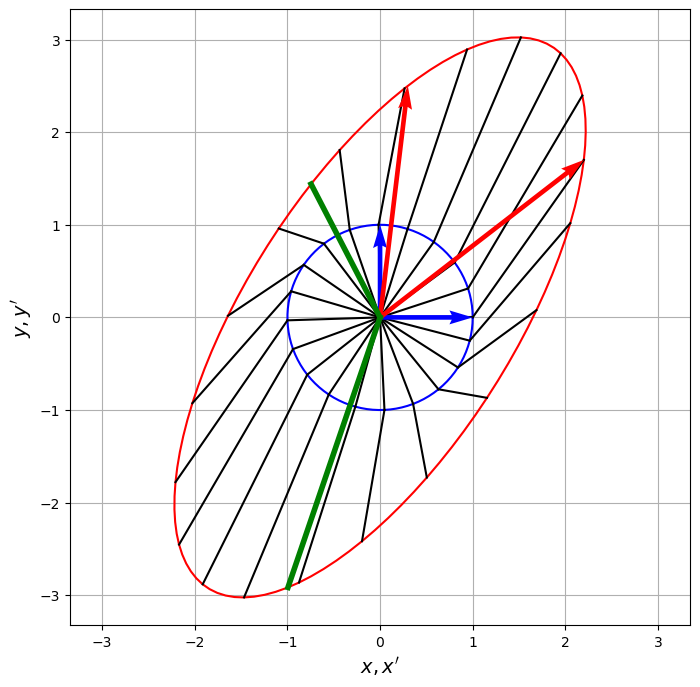

In [112]:
fig = plt.figure(figsize=(8, 8))

ax1 = fig.add_subplot(111)

# construct points on a circle parametrically
theta = np.linspace(0,2*np.pi,100)
np.append(theta, 0) # add a zero at the end so we go back to the start in the plot

# A 2xn array of points
points = np.vstack( (np.cos(theta), np.sin(theta)) )

ax1.set_xlabel("$x, x'$", fontsize=14)
ax1.set_ylabel("$y, y'$", fontsize=14)
ax1.grid(True)

x = np.array([1,0])
y = np.array([0,1])

# plot the circle
ax1.plot(points[0,:], points[1,:], color='blue')

# plot some vectors
ax1.quiver(x[0], x[1], angles='xy', scale_units='xy', scale=1, color='b', lw=2, zorder=10)
ax1.quiver(y[0], y[1], angles='xy', scale_units='xy', scale=1, color='b', lw=2, zorder=10)

A = np.array([[2.2,0.3],[1.7,2.5]])
#A = np.array([[1.5,0.0],[0.0,1.]])

xp = A@x
yp = A@y
pointsp = A@points

# plot the transformed circle
ax1.plot(pointsp[0,:], pointsp[1,:], color='red')

# plot the transformed vectors
ax1.quiver(xp[0], xp[1], angles='xy', scale_units='xy', scale=1, color='r', lw=2, zorder=10)
ax1.quiver(yp[0], yp[1], angles='xy', scale_units='xy', scale=1, color='r', lw=2, zorder=10)

# plot a subsect of vectors and how they transform
for i, angle in enumerate(theta[::5]):  # don't use all the angles
    ax1.plot([0,points[0,5*i]],[0,points[1,5*i]],'k')
    ax1.plot([points[0,5*i],pointsp[0,5*i]],[points[1,5*i],pointsp[1,5*i]],'k')

# compute and plot some special directions!
lam, vecs = sl.eig(A)
# plot the scaled eigenvectors
ax1.plot([0,np.real(lam[0])*vecs[0,0]], [0,np.real(lam[0])*vecs[1,0]], color='g', lw=4, zorder=20)
ax1.plot([0,np.real(lam[1])*vecs[0,1]], [0,np.real(lam[1])*vecs[1,1]], color='g', lw=4, zorder=20)

ax1.axis('equal')


<div class="optional">


This shows how the unit circle is mapped to an ellipse, i.e. how $\boldsymbol{x}$ of unit length are mapped to new points $A\boldsymbol{x}$.  

So the two-norm of the matrix is the maximum stretching of a vector - it's the maximum distance from the origin of the obtained ellipse, i.e. the point on the ellipse in the direction of the semi-major axis.

Now in the case of the symmetric matrix you might recall that this is just the largest eigenvalue.

For the above example we're not symmetric so the distance from the origin in terms of the eigenvalues is not obvious.

But recall our definition involving square roots of the eigenvalues of the matrix $A^* A$ - let's see what we have geometrically if we additionally multiply by $A^*$, which for this real case is just the transpose.

</div>

black dot (left): [1.857779 2.922773]
magenta dot (left): [-1.216     0.772917]
sl.norm(A_,2), sl.norm(origin_p,2), sl.norm(p,2), np.sqrt(sl.norm(p,2)):  11.993943939993677 3.46322738785568 11.993943939993676 3.46322738785568


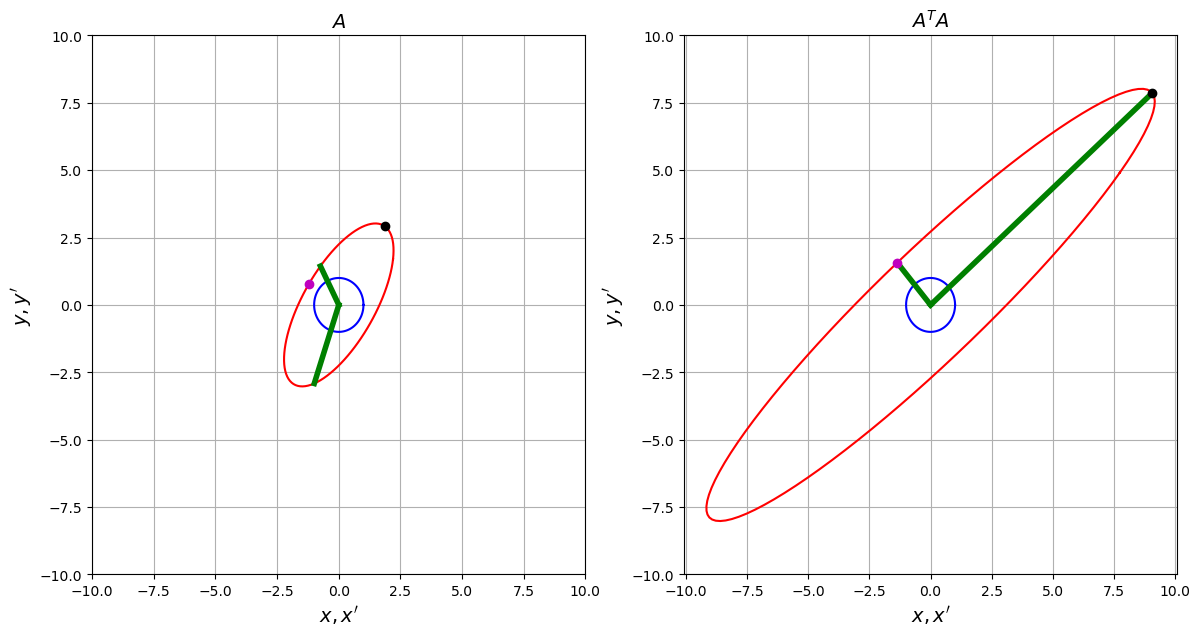

In [113]:
fig = plt.figure(figsize=(14, 7))

ax1 = fig.add_subplot(121)

# construct points on a circle parametrically
theta = np.linspace(0,2*np.pi,100)
np.append(theta, 0) # add a zero at the end so we go back to the start in the plot

# A 2xn array of points
points = np.vstack( (np.cos(theta), np.sin(theta)) )

ax1.set_xlabel("$x, x'$", fontsize=14)
ax1.set_ylabel("$y, y'$", fontsize=14)
ax1.set_title('$A$', fontsize=14)
ax1.grid(True)

x = np.array([1,0])
y = np.array([0,1])

# plot the circle
ax1.plot(points[0,:], points[1,:], color='blue')

A = np.array([[2.2,0.3],[1.7,2.5]])
 
xp = A@x
yp = A@y
pointsp = A@points

# plot the transformed circle
ax1.plot(pointsp[0,:], pointsp[1,:], color='red')

# compute and plot some special directions!
lam, vecs = sl.eig(A)
# plot the scaled eigenvectors
ax1.plot([0,np.real(lam[0])*vecs[0,0]], [0,np.real(lam[0])*vecs[1,0]], color='g', lw=4, zorder=20)
ax1.plot([0,np.real(lam[1])*vecs[0,1]], [0,np.real(lam[1])*vecs[1,1]], color='g', lw=4, zorder=20)

ax1.set_xlim(-10,10)
ax1.set_ylim(-10,10)
#ax1.axis('equal')
####################################
ax2 = fig.add_subplot(122)

ax2.set_xlabel("$x, x'$", fontsize=14)
ax2.set_ylabel("$y, y'$", fontsize=14)
ax2.set_title('$A^TA$', fontsize=14)
ax2.grid(True)

# plot the circle
ax2.plot(points[0,:], points[1,:], color='blue')

A_ = A.T @ A

xp = A_@x
yp = A_@y
pointsp = A_@points

# plot the transformed circle
ax2.plot(pointsp[0,:], pointsp[1,:], color='red')

# compute and plot some special directions!
lam, vecs = sl.eig(A_)
# plot the scaled eigenvectors
ax2.plot([0,np.real(lam[0])*vecs[0,0]], [0,np.real(lam[0])*vecs[1,0]], color='g', lw=4, zorder=20)
ax2.plot([0,np.real(lam[1])*vecs[0,1]], [0,np.real(lam[1])*vecs[1,1]], color='g', lw=4, zorder=20)

# plot a point at maximum distance in the right image
p = np.array([np.real(lam[0])*vecs[0,0], np.real(lam[0])*vecs[1,0]])
ax2.plot(p[0], p[1], 'ko', lw=4, zorder=30)

# and min distance
p2 = np.array([np.real(lam[1])*vecs[0,1], np.real(lam[1])*vecs[1,1]])
ax2.plot(p2[0], p2[1], 'mo', lw=4, zorder=30)

# plot where it came from on left
origin_p = sl.inv(A.T)@p
ax1.plot(origin_p[0], origin_p[1], 'ko', lw=4, zorder=30)

origin_p2 = sl.inv(A.T)@p2
ax1.plot(origin_p2[0], origin_p2[1], 'mo', lw=4, zorder=30)

print('black dot (left):', origin_p)
print('magenta dot (left):', origin_p2)


print('sl.norm(A_,2), sl.norm(origin_p,2), sl.norm(p,2), np.sqrt(sl.norm(p,2)): ',
      sl.norm(A_,2), sl.norm(origin_p,2), sl.norm(p,2), np.sqrt(sl.norm(p,2)))

ax1.set_xlim(-10,10)
ax2.set_ylim(-10,10)
#ax1.axis('equal')

<div class="optional">


The black dot on the left indicates the maximum stretching - its distance from the origin is the two-norm of this matrix.

What is this distance - the green vectors on the left (the e'vecs scales by the e'vals of $A$) show that this isn't obviously linked to the eigenvalues/vectors of $A$.

Let's multiply the red ellipse and the black/magenta dot locations through by $A^*$.

The black dots distance from the origin has been squared, but now (as we might have guessed as $A^*A$ is symmetric, this distance does now correspond to the maximum eigenvalue of this new matrix, which we conclude by seeing the eigenvector pointing in this direction.

Hence we conclude that the black dot on the left is a distance from the origin equal to the square root of the maximum eigenvalue of $A^*A$, and this is equal to the two-norm of the matrix - let's compute these three things to confirm this:

</div>

In [114]:
A = np.array([[2.2,0.3],[1.7,2.5]])
# two norm of matrix
print(sl.norm(A,2))
# square root of the max e'val of A^T A - symmetric so we know e'vals are real
print(np.sqrt(np.real((np.max(sl.eigvals( A.T @ A ))))))
# the distance of the black dot from origin in the left figure
print(sl.norm(origin_p,2)) # this is the vector norm

3.46322738785568
3.4632273878556803
3.46322738785568


<div class="optional">


The magenta dots are the minimum distance. By the same logic the minimum distance on the left is the square root of the minimum eigenvalue of $A^*A$.  Let's check this:

</div>

In [115]:
print(sl.norm(origin_p2,2))
print(np.sqrt(np.real((np.min(sl.eigvals( A.T @ A ))))))

1.4408525462400112
1.4408525462400115


<div class="optional">


But this is just one over the two-norm of the inverse matrix:

</div>

In [116]:
invA = sl.inv(A)
print(1./sl.norm(invA,2))
print(1./np.sqrt(np.real((np.max(sl.eigvals( invA.T @ invA ))))))

1.4408525462400115
1.4408525462400117


<div class="optional">


## The condition number

A measure of the distortion of the ellipse is the distance of the back dot from the origin divided by the distance of the magenta dot from the origin, which would be one if matrix multiplication mapped us to a circle but increasingly larger than one the more distorted the ellipse generated by the mapping.

For our example:

</div>

In [117]:
print(sl.norm(origin_p,2) / sl.norm(origin_p2,2))

2.4035959799586526


<div class="optional">

Which based on the above is equal to the ratio of the maximum to minimum singular values which is defined as the square root of the ratio of the maximum to minimum e/vals of $A^*A$, which is the square root of the product the maximum e/val of $A^*A$ and the maximum e/val of $(A^{-1})^*A^{-1}$, which is the product of the two-norms of $A$ and $A^{-1}$:

</div>

In [118]:
print(np.sqrt(np.real((np.max(sl.eigvals( A.T @ A ))))) / np.sqrt(np.real((np.min(sl.eigvals( A.T @ A ))))))
print(np.sqrt(np.real((np.max(sl.eigvals( A.T @ A ))))) * np.sqrt(np.real((np.max(sl.eigvals( invA.T @ invA ))))))
print(sl.norm(A,2)*sl.norm(sl.inv(A),2))

2.4035959799586526
2.403595979958652
2.403595979958652


<div class="optional">

which is a thing we call the *condition number*:

$$\textrm{cond}(A) = \|A\|\|A^{-1}\|$$

Let's check the NumPy method to compute this for the matrix $A$ agrees with our calculation above.

</div>

In [119]:
print(np.linalg.cond(A))
print(sl.norm(A,2)*sl.norm(sl.inv(A),2))

2.4035959799586526
2.403595979958652


<div class="optional">


Note that it was the matrix two-norm that gave the correct answer for the distortion of the ellipse.  This is the case when it is the vector two-norm (i.e. usual Euclidean distance) that we use for measuring the distance of points (as is normal and as we did above and below).

</div>

<div class="optional">


# Ill-conditioned matrices [*]

When we started talking about matrices we noted that as long as the matrix is non-singular, i.e. $\det(A)\ne 0$, then an inverse exists, and a linear system with that $A$ has a unique solution. We left it at that. 

What we can do now is think about the situation where the determinant is *non-zero but small*.

Well smallness is a relative term and so we need to ask the question of how large or small $\det(A)$ is compared to something. 

The condition number

$$\textrm{cond}(A) = \|A\|\|A^{-1}\|$$

gives us a measure for the singularity of the matrix that *is relative*.

If this is close to one then $A$ is termed well-conditioned; the value increases with the degree of ill-conditioning, reaching infinity for a singular matrix.

For large matrices the condition number is expensive to compute (as computing eigenvalues is expensive). In practice it is possible to use the relative size of the determinant of the matrix to the magnitude of the entries of the matrix to estimate the conditioning.

</div>

<div class="optional">


Based on the example above, we've seen that the higher the condition number the more distorted this ellipse is,

or thought of in another important way, higher condition numbers (more singular matrices) have the potential to mean that  perturbations in either the entries of the matrix $A$ or the RHS vector $\boldsymbol{b}$ can result in larger perturbations in the solution to the linear system:

$$A(\boldsymbol{x}+\delta \boldsymbol{x}) = \boldsymbol{b} + \delta \boldsymbol{b}, \qquad (A+\delta A) (\boldsymbol{x}+\delta \boldsymbol{x}) = \boldsymbol{b}$$

For the first we are concerned with how perturbations to the RHS map to perturbations in the solution.

In the second we are concerned with how perturbations to the matrix map to perturbations in the solution.

These are both important considerations as errors could creep into the entries of $A$ and/or $\boldsymbol{b}$, e.g. small round-off errors could be introduced as the entries are computed from some underlying discretisation, or perhaps measurement errors if the entries are dependent on real world observations.

Again, we are interested in the *relative* size of perturbations, e.g. for the first perturbation case above we want to know how $ {\|\delta \boldsymbol{x}\|} / {\|\boldsymbol{x}\|}$ relates to ${\|\delta \boldsymbol{b}\|} / {\|\boldsymbol{b}\|} $. It turns out that it is exactly the condition number that describes (or rather gives a suitable bound on) this:


$$\frac{\|\delta \boldsymbol{x}\|}{\|\boldsymbol{x}\|}  
\leq \text{cond}(A)  
\frac{\|\delta \boldsymbol{b}\|}{\|\boldsymbol{b}\|}$$

with a similar bound possible for the case where it's the entries of the matrix that are perturbed.

Essentially what we have is an ability to relate potential (i.e. worst case) errors in the output of a solver to errors in the inputs:

$$ \text{condition number} \sim \frac{ \text{relative error of output} }{ \text{relative error of input} }, $$

in words, the condition number tells us about the sensitivity of the outputs of an algorithm to perturbations of the inputs

$$ \text{relative error of output}  \sim  \text{condition number} \times  \text{relative error of input}. $$

</div>

<div class="optional">


## An Example

We know that a singular matrix does not result in a unique solution to its corresponding linear matrix system. But what are the consequences of near-singularity (ill-conditioning)?

Consider the following example


$$
\left(
  \begin{array}{cc}
    2 & 1 \\
    2 & 1 + \epsilon  \\
  \end{array}
\right)\left(
  \begin{array}{c}
    x \\
    y \\
  \end{array}
\right) = \left(
  \begin{array}{c}
    3 \\
    0 \\
  \end{array}
\right)
$$

Clearly when $\epsilon=0$ the two columns/rows are not linear independent, and hence the determinant of this matrix is zero, the condition number is infinite, and the linear system does not have a solution (as the two equations would be telling us the contradictory information that $2x+y$ is equal to 3 and is also equal to 0).

Consider a range of small values for $\epsilon$ and calculate the matrix determinant, the condition number and the solution to the system.

</div>

In [120]:
A = np.array([[2.,1.],
              [2.,1.]])
b = np.array([3.,0.])

print('det of A is', sl.det(A), 'thus it is singular')

#adding small pertubation to one entry of A
for i in range(3):
    A[1,1] += 0.001
    print(A[1,1]-1, sl.det(A), np.linalg.cond(A),  sl.inv(A) @ b )

det of A is 0.0 thus it is singular
0.0009999999999998899 0.0019999999999997797 5001.000300040541 [ 1501.5 -3000. ]
0.0019999999999997797 0.0039999999999995595 2501.0006001602164 [  751.5 -1500. ]
0.0029999999999996696 0.005999999999999339 1667.6675670268792 [  501.5 -1000. ]


<div class="optional">


We find that for $\;\epsilon=0.001$,  $\;\;\det(A)=0.002\;\;$ (i.e. quite a lot smaller than the coefficients in the matrix) and $\textrm{cond}(A)\approx 5000$.

In this case we compute the solution as $\boldsymbol{x}=(1501.5,-3000.)^T$.

But notice what happens when we make a very small change to the coefficients of the matrix (e.g. set $\epsilon=0.002$ - i.e. a relatively small perturbation compared to the size of the matrix).

This change of just $0.1\%$ in one of the coefficients of the matrix results in a $100\%$ change in both components of the solution!


Similar to how we considered things geometrically previously, let's plot what the mapping of the circle under multiplication by the matrix looks like for this problem.

</div>

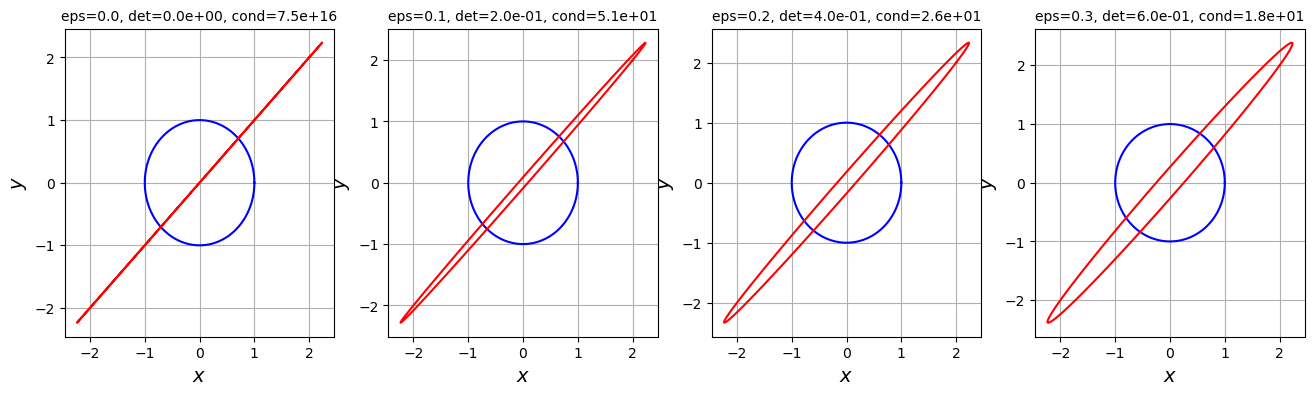

In [121]:
A = np.array([[2.,1.],[2.,1.]])

n_figs = 4

# construct points on a circle parametrically
theta = np.linspace(0,2*np.pi,100)
np.append(theta, 0) # add a zero at the end so we go back to the start in the plot

# A 2xn array of points
points = np.vstack( (np.cos(theta), np.sin(theta)) )

x = np.array([1,0])
y = np.array([0,1])

fig, axs = plt.subplots(1, n_figs, figsize=(4*n_figs, 4))
for i in range(n_figs):
    eps = i*0.1
    A[1,1] = 1 + eps
    axs[i].set_xlabel("$x$", fontsize=14)
    axs[i].set_ylabel("$y$", fontsize=14)
    axs[i].set_title('eps={0:.1f}, det={1:.1e}, cond={2:.1e}'.format(eps, sl.det(A), np.linalg.cond(A)), fontsize=10)
    axs[i].grid(True)
    # plot the circle
    axs[i].plot(points[0,:], points[1,:], color='blue')
    # transform the circle
    xp = A@x
    yp = A@y
    pointsp = A@points
    # plot the transformed circle
    axs[i].plot(pointsp[0,:], pointsp[1,:], color='red')

<div class="optional">


The first case is singular, and the mapped shape in red is just a line, while it's an ellipse of decreasing distortion as we increase the perturbation size - i.e. as we move away from a singular matrix.

If you look closely you will see that the ellipse not only changes its distortion, it also rotates a little bit. So there are more subtle things going on here than just the ellipse becoming less distorted.

</div>

<div class="optional">


Like the example in the previous section, let's compute the extreme magenta and black points for this example.

</div>

black dot - origin_p: [2.235621 2.282122]
magenta dot - origin_p2: [-0.044721  0.04381 ]


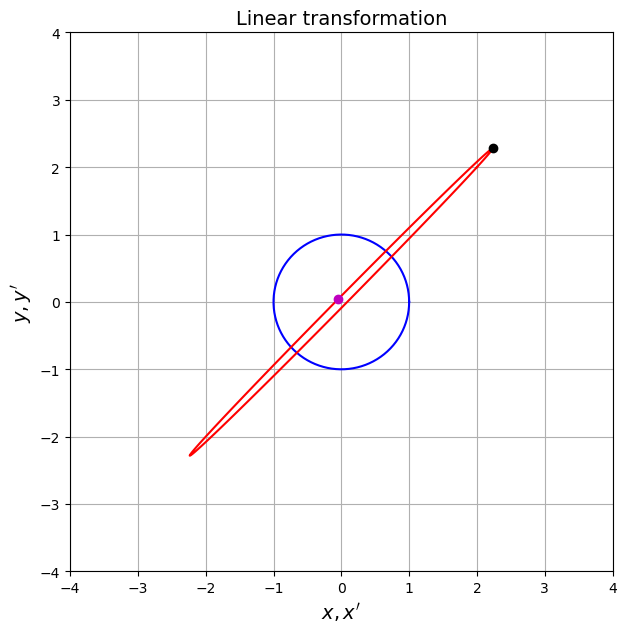

In [122]:
A = np.array([[2.,1.],[2.,1. + 0.1]])

A_ = A.T @ A

lam, vecs = sl.eig(A_)

# a point at maximum distance 
p = np.array([np.real(lam[0])*vecs[0,0], np.real(lam[0])*vecs[1,0]])

# and min distance
p2 = np.array([np.real(lam[1])*vecs[0,1], np.real(lam[1])*vecs[1,1]])

# where these came from on left
origin_p = sl.inv(A.T)@p
origin_p2 = sl.inv(A.T)@p2

print('black dot - origin_p:', origin_p)
print('magenta dot - origin_p2:', origin_p2)

fig = plt.figure(figsize=(7, 7))
ax1 = fig.add_subplot(111)

# construct points on a circle parametrically
theta = np.linspace(0,2*np.pi,100)
np.append(theta, 0) # add a zero at the end so we go back to the start in the plot

# A 2xn array of points
points = np.vstack( (np.cos(theta), np.sin(theta)) )

ax1.set_xlabel("$x, x'$", fontsize=14)
ax1.set_ylabel("$y, y'$", fontsize=14)
ax1.set_title('Linear transformation', fontsize=14)
ax1.grid(True)

x = np.array([1,0])
y = np.array([0,1])

# plot the circle
ax1.plot(points[0,:], points[1,:], color='blue')

xp = A@x
yp = A@y
pointsp = A@points

# plot the transformed circle
ax1.plot(pointsp[0,:], pointsp[1,:], color='red')

# add the extreme points
ax1.plot(origin_p[0], origin_p[1], 'ko', lw=4, zorder=30)
ax1.plot(origin_p2[0], origin_p2[1], 'mo', lw=4, zorder=30)

ax1.set_xlim(-4,4)
ax1.set_ylim(-4,4)

<div class="optional">
 
 
 Let's fix the RHS $\boldsymbol{b}$, perturb the matrix by eps as above, and see how the solution $x$ changes:
 
 </div>

In [123]:
# eps = 0.1
A1 = np.array([[2.,1.],[2.,1. + 0.1]])
b1 = origin_p

# Perturn one of the entries of A by eps = 0.2
A2 = np.copy(A1)
A2[1,1] = 1+0.2

# compute solution to the linear system in original ..
x1 = sl.inv(A1)@b1
print(x1)

# and perturbed form
x2 = sl.inv(A2)@b1
print(x2)

print("Rel error in A's: ", (sl.norm(A2 - A1,2)/sl.norm(A1,2)))
print("Rel error in x's: ", (sl.norm(x1 - x2)/sl.norm(x1)))
print("Ratio of these (x's over A's): ",(sl.norm(x1 - x2)/sl.norm(x1)) /  (sl.norm(A2 - A1,2)/sl.norm(A1,2)))
print(np.linalg.cond(A))

[0.885304 0.465012]
[1.001557 0.232506]
Rel error in A's:  0.03130188557682524
Rel error in x's:  0.2599498776103063
Ratio of these (x's over A's):  8.304607624109506
51.0304038391865


<div class="optional">

So the condition number does indeed give us a **bound** on how the relative change in the $\boldsymbol{x}$'s depends on the relative change in $A$.

Now let's see what happens if we fix $A$ and perturb the RHS:

</div>

In [124]:
A = np.array([[2.,1.],[2.,1. + 0.1]])

# let's start from the black dot location
b1 = origin_p
# and perturb a little in the magenta dot direction
b2 = b1 + 0.1*origin_p2

x1 = sl.inv(A)@b1
print(x1)

x2 = sl.inv(A)@b2
print(x2)

print("Rel error in b's: ", (sl.norm(b1 - b2)/sl.norm(b1)))
print("Rel error in x's: ", (sl.norm(x1 - x2)/sl.norm(x1)))
print("Ratio of these (x's over b's): ",(sl.norm(x1 - x2)/sl.norm(x1)) /  (sl.norm(b1 - b2)/sl.norm(b1)))
print(np.linalg.cond(A))

[0.885304 0.465012]
[0.838803 0.553543]
Rel error in b's:  0.0019596160813294275
Rel error in x's:  0.10000000000000474
Ratio of these (x's over b's):  51.030403839186455
51.0304038391865


<div class="optional">


So in this case due to our choice of $\boldsymbol{b}$ and perturbation direction, the condition number actually gives a very tight bound on how the relative perturbation to $\boldsymbol{x}$ depends on the relative perturbation to $\boldsymbol{b}$.

Let's plot this:

</div>

(sl.norm(x1 - x2)/sl.norm(x1)) /  (sl.norm(b1 - b2)/sl.norm(b1))):  51.030403839186455
np.linalg.cond(A) : 51.0304038391865


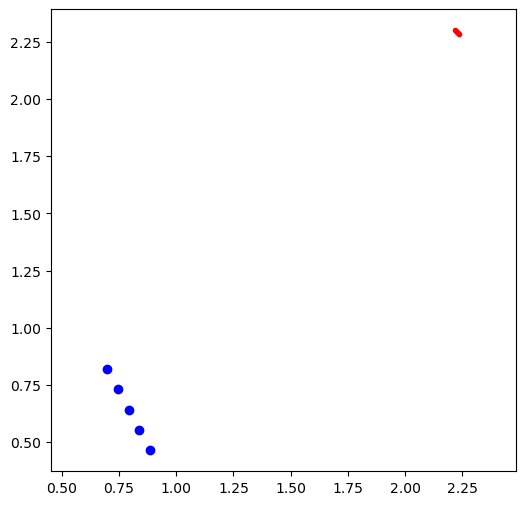

In [125]:
A = np.array([[2.,1.],[2.,1. + 0.1]])
b = origin_p
pert = origin_p2

fig = plt.figure(figsize=(6, 6))

ax1 = fig.add_subplot(111)

for i in range(5):
    b_ = b + i*0.1*pert
    ax1.plot( b_[0], b_[1], 'r.')
    x_ = sl.inv(A)@b_
    ax1.plot( x_[0], x_[1], 'bo')

ax1.axis('equal')

b1 = b
x1 = sl.inv(A)@b1
b2 = b + 0.1*pert
x2 = sl.inv(A)@b2
print("(sl.norm(x1 - x2)/sl.norm(x1)) /  (sl.norm(b1 - b2)/sl.norm(b1))): ",(sl.norm(x1 - x2)/sl.norm(x1)) /  (sl.norm(b1 - b2)/sl.norm(b1)))
print("np.linalg.cond(A) :", np.linalg.cond(A))

<div class="optional">


The five red dots are a series of perturbed RHS vectors, the blue dots are the corresponding solutions to the linear system - small errors lead to large consequences in this example!

There's more on this in the homework.

We'll also see some examples of larger matrices, where we'll see that increasing the matrix size leads to a larger condition number.

</div>

# Algorithm stability

The susceptibility for a numerical algorithm to dampen (inevitable) errors, rather than to magnify them as we have seen in examples above, is termed *stability*.  

This is a concern for numerical linear algebra as steps in an iterative algorithm could introduce errors into the matrix or the RHS, 

as well as for the numerical solution of differential equations as we will see later in the course.  

In that latter case we don't want small errors to grow and accumulate as we propagate the solution to an ODE or PDE forward in time for example.

If your algorithm is not inherently stable, or has other limitation, you need to understand and appreciate this, as it can cause catastrophic failures! 


# Summary

This lecture has covered what it means for a model to be right, how we can establish this rigorously, and how things can go wrong.

We have covered formal verification, validation and error estimation processes, and explained the powerful approach offered via the method of manufactured solutions.

We touched on how small inevitable errors can, for some problems, have disastrous consequences.